Imports 

In [2]:


import this # as a preliminary prayer

# major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# to improve computing speed  for svm - should be imported before sci-kit learn 
from sklearnex import patch_sklearn 
patch_sklearn()


#warnings 
import warnings
warnings.filterwarnings('ignore')

# to test if the target variable depends on the categorical feature
from scipy.stats import chi2_contingency

# to change objects to datetime stamps
from datetime import datetime
#import matplotlib.dates as mdates

# This will be used to get the dictionary mapping for the car company encodings done using LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import scale

# To encode labels
from sklearn.preprocessing import LabelEncoder

# to select the principal features
from sklearn.feature_selection import mutual_info_regression

# This will be required to scale the data.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# for treating unbalanced classes
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import ADASYN  # alternative to smote


# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# all the metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

# for svm model
from sklearn import svm
from sklearn.svm import SVC

#for GX boost algoritm
import xgboost
from xgboost import XGBClassifier






The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

In [4]:
train = pd.read_csv('train_git.csv')     # original data train set 
DF = pd.DataFrame(train)

test = pd.read_csv('test_git.csv')      # original data test set


#DFv = pd.DataFrame(pd.read_csv('RAW DATA_total train plus test.csv'))     # merged data to dataframe
DF.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
print(DF.shape) # the composite dataframe shape
print(len(train. index))   # rows in train set

(233154, 41)
233154


In [6]:
dRows = DF[DF.duplicated()]    # check if any duplicates
dRows

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default


In [7]:
# find and locate missing values
print('Does the dataframe have missing missing values?', DF.isnull().values.any())
print('How many?', DF.isnull().sum().sum())


DF.info()

Does the dataframe have missing missing values? True
How many? 7661
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDat

Let's find,remove outliers and rescale the numerical data

Missing values are systematically distributed in the feature: 

*9   Employment.Type                      334442 non-null  object*

The employment status is categorical variable with three categories: Salaried, Selfemployed and NaN.

Let's compute a crosstable to see whether the feature affect loans default variable

In [8]:

Crosstab=pd.crosstab(index=DF['Employment.Type'],columns=DF['loan_default'])
print(Crosstab)

ChiSqRes = chi2_contingency(Crosstab)
print(ChiSqRes)

loan_default         0      1
Employment.Type              
Salaried         77948  19910
Self employed    98578  29057
Chi2ContingencyResult(statistic=190.6579236758318, pvalue=2.2841351170641894e-43, dof=1, expected_freq=array([[76607.6166799, 21250.3833201],
       [99918.3833201, 27716.6166799]]))


$pvalue = 2.2841351170641894e-43 on 1 degree of freedom $ - which means the employment status is very important explanatory category with high confidence level. Let's replace Nan with "unknown" label and check if no others Nan.

In [9]:
DF = DF.fillna('unknown')
DF.isnull().values.any()

False

Some columns are individual identifying numbers, they are unique and are not relevant to any analysis. We can drop them immediately:
* UniqueID                                        int64
* Current_pincode_ID                              int64


In [10]:
DFd = DF.drop(['UniqueID', 'Current_pincode_ID', ], axis=1)

print(DF.shape) # check the dimensions again

(233154, 41)


Lets see loan defaults vs paid loans distribution.

As the feature has only three labels and for the sake of exploration, lets use dummies method to make code Employment.

In [11]:
DFd1 = pd.get_dummies(DFd, columns = ['Employment.Type'])
DFd1.drop(['Employment.Type_Salaried'], axis =1, inplace = True)
print(DFd1.shape)
DFd1.head()

#DFd1.drop(['Date.of.Birth', 'DisbursalDate'], axis=1, inplace=True)

(233154, 40)


,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Date.of.Birth,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Employment.Type_Self employed,Employment.Type_unknown
0,50578,58400,89.55,67,22807,45,01-01-84,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0
1,47145,65550,73.23,67,22807,45,31-07-85,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1,0
2,53278,61360,89.63,67,22807,45,24-08-85,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1,0
3,57513,66113,88.48,67,22807,45,30-12-93,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1,0
4,52378,60300,88.39,67,22807,45,09-12-77,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1,0


Convert the objects to dates:

8   Date.of.Birth                        233154 non-null  object 

10  DisbursalDate                        233154 non-null  object

In [12]:
DFd1['Date.of.Birth'] = pd.to_datetime(DFd1['Date.of.Birth'], format='%d-%m-%y')
DFd1['DisbursalDate'] =  pd.to_datetime(DFd1['DisbursalDate'], format='%d-%m-%y')


# !!!! huge mistake - spent a lot of time trying to work out how to change wrongly recorded years, but at the end the variables were noise to the model. CONCLUSION: first check if they are valid, even some of them, before complex operations.

# when I started to treat age outliers, discovered almost 20 000 negative values, and after the investigation, that partially the birthdates were erroneusly recorded a hundred years later.

'''Column: age Count of outliers: 19866 Outliers to Sample Ratio: 0.08520548650248334 Mean: 25.949611093588118 
lower_bound: 4.091718001368921 Min: -50.392881587953454 upper_bound: 58.290212183436005 Max: 49.828884325804246 

DFd1 = DFd1[DFd1["DisbursalDate"] > DFd1["Date.of.Birth"]]
#print(DFd1[DFd1["DisbursalDate"] < DFd1['Date.of.Birth']]['Date.of.Birth'])
print(DFd1.shape)

# compute age in years as a float
DFd1['age'] = (DFd1['DisbursalDate'] - DFd1['Date.of.Birth']).dt.days / 365.25
DFd1.head(5)'''

DFd1.drop(['Date.of.Birth', 'DisbursalDate'], axis=1, inplace=True)


Convert the objects to integers: 

37  AVERAGE.ACCT.AGE                     112392 non-null  object 

38  CREDIT.HISTORY.LENGTH                112392 non-null  object 


In [13]:
# calculate total months from the columns
DFd1['AVERAGE.ACCT.AGE.M'] = DFd1['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split('yrs')[0])*12 + int(x.split(' ')[1].split('mon')[0]))
DFd1['CREDIT.HISTORY.LENGTH.M'] = DFd1['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split('yrs')[0])*12 + int(x.split(' ')[1].split('mon')[0]))

# drop the original columns
DFd1.drop('AVERAGE.ACCT.AGE', axis=1, inplace=True)
DFd1.drop('CREDIT.HISTORY.LENGTH', axis=1, inplace=True)

# display the transformed DataFrame column
print(DFd1['AVERAGE.ACCT.AGE.M'].head(5))
print(DFd1['CREDIT.HISTORY.LENGTH.M'].head(5))

0     0
1    23
2     0
3     8
4     0
Name: AVERAGE.ACCT.AGE.M, dtype: int64
0     0
1    23
2     0
3    15
4     0
Name: CREDIT.HISTORY.LENGTH.M, dtype: int64


Lets transform all flags to categorical variables directly, as they already have binary values, to checked whether any flags categories are explanatory for the target variable

In [14]:
categorical_cols = ['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag','Driving_flag', 'Passport_flag']

# convert specified columns to categorical
DFd1[categorical_cols] = DFd1[categorical_cols].astype("category")

# print resulting dataframe
print(DFd1.dtypes)

disbursed_amount                          int64
asset_cost                                int64
ltv                                     float64
branch_id                                 int64
supplier_id                               int64
manufacturer_id                           int64
State_ID                                  int64
Employee_code_ID                          int64
MobileNo_Avl_Flag                      category
Aadhar_flag                            category
PAN_flag                               category
VoterID_flag                           category
Driving_flag                           category
Passport_flag                          category
PERFORM_CNS.SCORE                         int64
PERFORM_CNS.SCORE.DESCRIPTION            object
PRI.NO.OF.ACCTS                           int64
PRI.ACTIVE.ACCTS                          int64
PRI.OVERDUE.ACCTS                         int64
PRI.CURRENT.BALANCE                       int64
PRI.SANCTIONED.AMOUNT                   

Let's use contingency tables to find if flags categories are explanatory for the target variable. Here: column MobileNo_Avl_Flag does not related to the loan default variable. 

In [15]:
'''# Select the categorical columns and the target column
cat_cols = DFd1.columns[8:13]
target_col = 'loan_default'

# Create a contingency table for each pair of categorical and target columns
contingency_tables = []
for col in cat_cols:
    contingency_table = pd.crosstab(DFd1[col], DFd1[target_col])
    contingency_tables.append(contingency_table)

# Compute the chi-squared statistic and p-value for each contingency table
correlations = []
for table in contingency_tables:
    chi2, p, dof, ex = chi2_contingency(table)
    correlations.append(p)

# Drop columns with zero correlation on a 0.01 confidence level
for i, col in enumerate(cat_cols):
    if correlations[i] > 0.01:
        DFd1 = DFd1.drop(col, axis=1)
        print(f"Dropped column {col} due to zero correlation with {target_col} on a 0.01 confidence level.")

# Print the remaining columns
print(DFd1.columns)'''

'# Select the categorical columns and the target column\ncat_cols = DFd1.columns[8:13]\ntarget_col = \'loan_default\'\n\n# Create a contingency table for each pair of categorical and target columns\ncontingency_tables = []\nfor col in cat_cols:\n    contingency_table = pd.crosstab(DFd1[col], DFd1[target_col])\n    contingency_tables.append(contingency_table)\n\n# Compute the chi-squared statistic and p-value for each contingency table\ncorrelations = []\nfor table in contingency_tables:\n    chi2, p, dof, ex = chi2_contingency(table)\n    correlations.append(p)\n\n# Drop columns with zero correlation on a 0.01 confidence level\nfor i, col in enumerate(cat_cols):\n    if correlations[i] > 0.01:\n        DFd1 = DFd1.drop(col, axis=1)\n        print(f"Dropped column {col} due to zero correlation with {target_col} on a 0.01 confidence level.")\n\n# Print the remaining columns\nprint(DFd1.columns)'

As the most of the features have many labels, let's use LabelEncodel method to bin them in to categories.

**Features for Label binning:** 



* State_ID                                        int64
* Employee_code_ID                                int64
* 'manufacturer_id'                               int64
* branch_id                                       int64
* supplier_id                                     int64
* PERFORM_CNS.SCORE                               int64
* PERFORM_CNS.SCORE.DESCRIPTION                  object

In [16]:
LE = LabelEncoder()

DFd1['State_ID'] = DFd1['State_ID'].astype('category')
DFd1['Employee_code_ID'] = DFd1['Employee_code_ID'].astype('category')
DFd1['supplier_id'] = DFd1['supplier_id'].astype('category')
DFd1['manufacturer_id'] = DFd1['manufacturer_id'].astype('category')
DFd1['PERFORM_CNS.SCORE'] = DFd1['PERFORM_CNS.SCORE'].astype('category')
DFd1['branch_id'] = DFd1['branch_id'].astype('category')


DFd1['State_ID'] = LE.fit_transform(DFd1['State_ID'])
DFd1['Employee_code_ID'] = LE.fit_transform(DFd1['Employee_code_ID'])
DFd1['supplier_id'] = LE.fit_transform(DFd1['supplier_id'])
DFd1['manufacturer_id'] = LE.fit_transform(DFd1['manufacturer_id'])
DFd1['State_ID'] = LE.fit_transform(DFd1['State_ID'])
DFd1['branch_id'] = LE.fit_transform(DFd1['branch_id'])


In [17]:
DFd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   disbursed_amount                     233154 non-null  int64   
 1   asset_cost                           233154 non-null  int64   
 2   ltv                                  233154 non-null  float64 
 3   branch_id                            233154 non-null  int64   
 4   supplier_id                          233154 non-null  int64   
 5   manufacturer_id                      233154 non-null  int64   
 6   State_ID                             233154 non-null  int64   
 7   Employee_code_ID                     233154 non-null  int64   
 8   MobileNo_Avl_Flag                    233154 non-null  category
 9   Aadhar_flag                          233154 non-null  category
 10  PAN_flag                             233154 non-null  category
 11  

In [18]:
 
print(DF['manufacturer_id'].nunique())
DFd1['manufacturer_id'] = DFd1['manufacturer_id'].astype('category')

11


In [19]:
'''DFd1 = pd.get_dummies(DFd1, columns = ['manufacturer_id'])
DFd1.drop(['manufacturer_id_0'], axis =1, inplace = True)
print(DFd1.shape)
DFd1.head()'''

"DFd1 = pd.get_dummies(DFd1, columns = ['manufacturer_id'])\nDFd1.drop(['manufacturer_id_0'], axis =1, inplace = True)\nprint(DFd1.shape)\nDFd1.head()"

In [20]:
DFd1['PERFORM_CNS.SCORE.DESCRIPTION'] = DFd1['PERFORM_CNS.SCORE.DESCRIPTION'].astype('category')
print(DF['PERFORM_CNS.SCORE.DESCRIPTION'].nunique())
print(DFd1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()) # check if the feature transformed to fit in the model


20
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Sco

'PERFORM_CNS.SCORE' numbers have negative correlation to risk - the higher number, the lower risk and can be treated as category of order, transformed to integer and scaled as other numerical regressors. No outliers even if discovered will not be removed. Directly to scaling

Group the categories and assign them integers, depending on level of perceived risk, with 0 highest.

In [21]:
replace_dict = {
    'No Bureau History Available': 0,
    'Not Scored: Sufficient History Not Available': 0,
    'Not Scored: Not Enough Info available on the customer': 0,
    'Not Scored: No Activity seen on the customer (Inactive)': 0,
    'Not Scored: No Updates available in last 36 months': 0,
    'Not Scored: Only a Guarantor': 0,
    'Not Scored: More than 50 active Accounts found': 0,
    'M-Very High Risk': 1,
    'L-Very High Risk': 1,
    'K-High Risk': 2,
    'J-High Risk': 2,
    'I-Medium Risk': 3,
    'H-Medium Risk': 3,
    'G-Low Risk': 4,
    'F-Low Risk': 4,
    'E-Low Risk': 4,
    'D-Very Low Risk': 5,
    'C-Very Low Risk': 5,
    'B-Very Low Risk': 5,
    'A-Very Low Risk': 5
}

DFd1['PERFORM_CNS.SCORE.DESCRIPTION'] = DFd1['PERFORM_CNS.SCORE.DESCRIPTION'].replace(replace_dict)
DFd1['PERFORM_CNS.SCORE.DESCRIPTION'].head(10)


0    0
1    3
2    0
3    1
4    0
5    5
6    0
7    0
8    5
9    5
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: category
Categories (6, int64): [5, 4, 3, 2, 1, 0]

Text(0.5, 1.0, 'Correlation Heatmap')

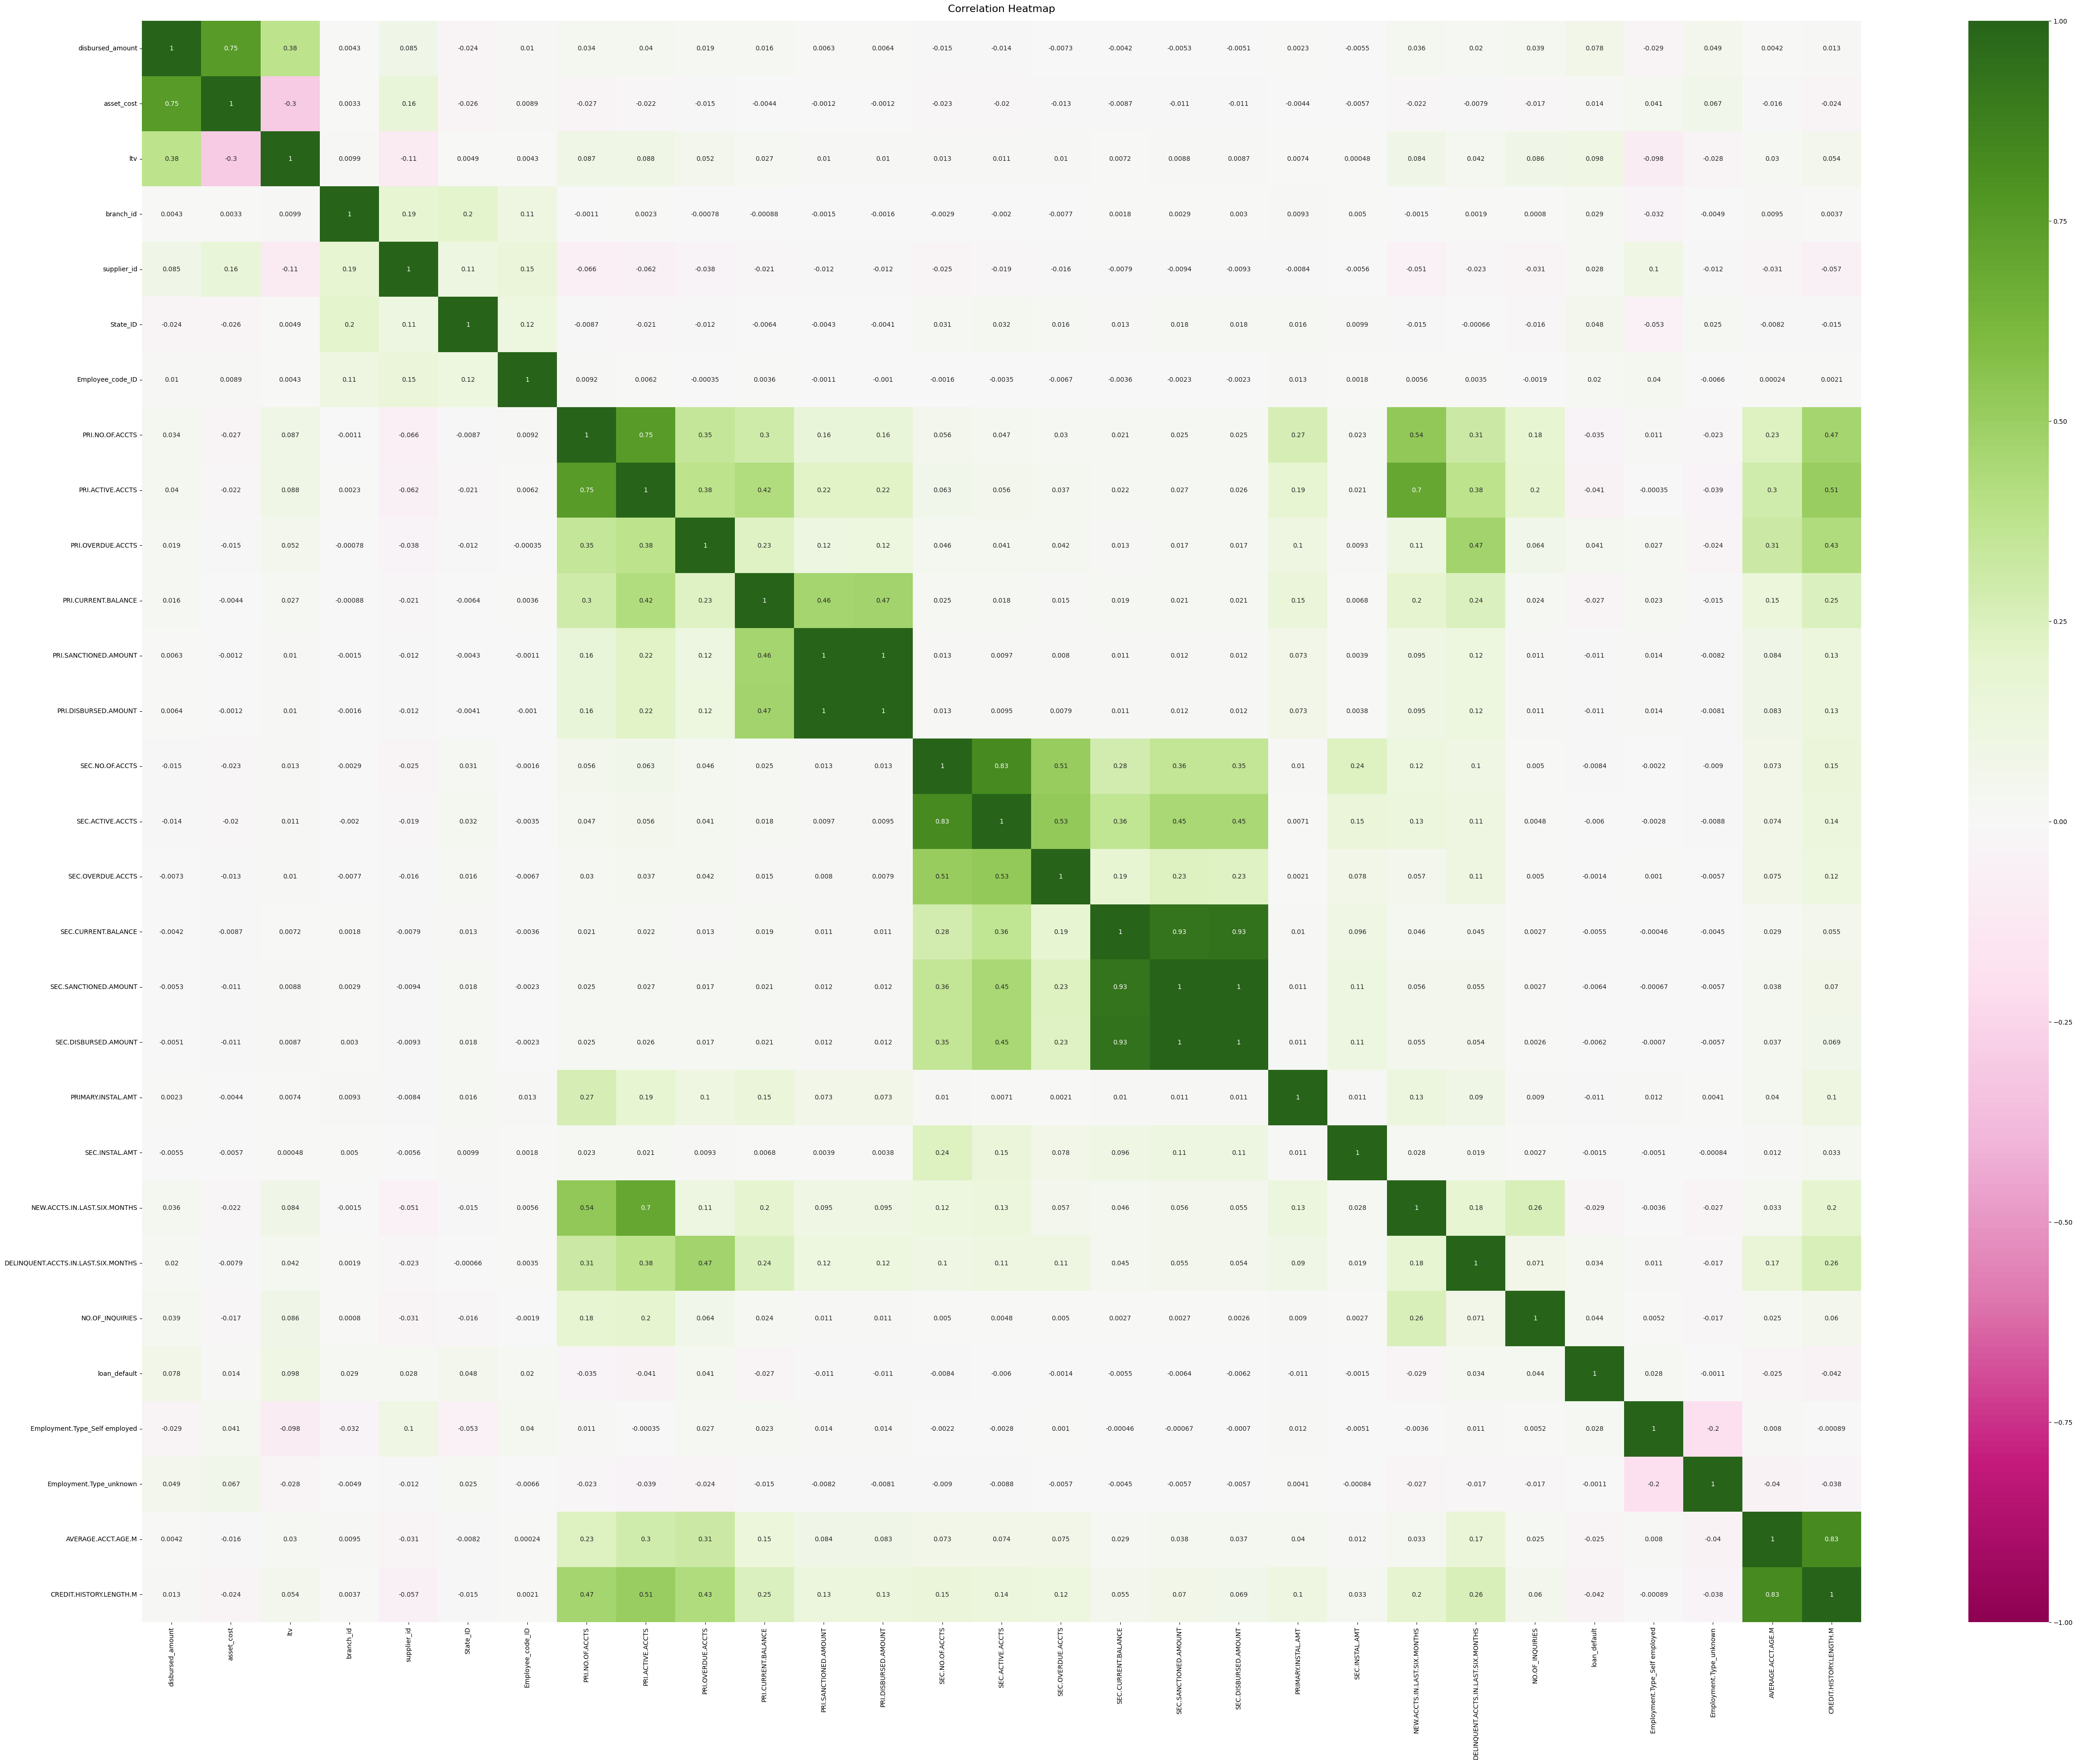

In [22]:

plt.figure(figsize=(60, 45))   # increases size of the heatmap
heatmap = sns.heatmap(DFd1.corr(), vmin=-1, vmax=1, cmap="PiYG", annot=True)  # sets names of the annotations as cor coefficients and annotates them and store the heatmap in variable for easier access
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=14) 

From the Correlation Heatmap we can conclude, that none of the variables has linear relations with the targer variable, 'disbursed_amount' and 'asset_cost' are highly correlated and explained by being a proportional, being parts of one process. Instead of using both values, we can use difference between them to study it's relations with the target variable

In [23]:
DFd1['Paid_to_cost_diff'] = DFd1['asset_cost'] - DFd1['disbursed_amount']  # create a new column with the difference to remove the correlative component

DFd1.drop(['disbursed_amount', 'asset_cost'], axis=1, inplace=True)
print(DFd1.columns)

Index(['ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default', 'Employment.Type_Self employed',
       'Employment.Type_unknown', 'AVERAGE.ACCT.AGE.M',
       'CREDIT.HISTORY.LENGTH.M', 'Paid_to_cost_diff'],
      dtype='object')


Additionally, from the Correlation Heatmap follows that pairs 
* 'PRI.NO.OF.ACCTS' and *'PRI.ACTIVE.ACCTS'*, 
* 'PRI.SANCTIONED.AMOUNT' and *'PRI.DISBURSED.AMOUNT'*, 
* 'SEC.NO.OF.ACCTS' and *'SEC.ACTIVE.ACCTS'*, 
* 'AVERAGE.ACCT.AGE.M' and *'CREDIT.HISTORY.LENGTH.M'*
* three variables 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT' and *'SEC.DISBURSED.AMOUNT'*
have positive correlation, higher than 83%, and means - linearly correlated. As only one from the group carries new information and to keep the model parsimonious, we can drop one of the variables without significant loss of the information.

Variables  'Aadhar_flag' and  *'VoterID_flag'* are negatively correlated with -0.87 and both of them are binary, we can drop one without loss of information for binomial responce.

Disbursal year is only 2018, so it does not carry relevant to analysis information 

Lets remove the features to reduce the model noise, same time leaving essential for decision information

!! I AM going to leave the var in italic, and drop other columns.

In [24]:
# The list of columns to be dropped
# columns_to_drop = ['PRI.NO.OF.ACCTS', 'PRI.SANCTIONED.AMOUNT', 'SEC.NO.OF.ACCT', 'AVERAGE.ACCT.AGE.M', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT' , 'Aadhar_flag']

DFd1.drop(['branch_id', 'supplier_id','State_ID', 'Employee_code_ID','PERFORM_CNS.SCORE', 'manufacturer_id'], axis =1 , inplace = True)
#  


# trust to the hackaton participant and as dealing with the variable is out of the current work scope, but for the model simplicity sake

# Drop the columns from the dataframe
DFd1.drop (['PRI.NO.OF.ACCTS', 'PRI.SANCTIONED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT' ], axis=1, inplace=True)





Find if the categories are explanatory for the target variable

In [25]:
''' Tried but it was not very helpful for the features selection in the case

# Separate the target column from the rest of the data
X = DFd1.drop('loan_default', axis=1)
y = DFd1['loan_default']

# Estimate mutual information for each feature
mi_scores = mutual_info_regression(X, y)

# Print the results
for i, col in enumerate(X.columns):
    print(f"{col}: {mi_scores[i]}")''' 

' Tried but it was not very helpful for the features selection in the case\n\n# Separate the target column from the rest of the data\nX = DFd1.drop(\'loan_default\', axis=1)\ny = DFd1[\'loan_default\']\n\n# Estimate mutual information for each feature\nmi_scores = mutual_info_regression(X, y)\n\n# Print the results\nfor i, col in enumerate(X.columns):\n    print(f"{col}: {mi_scores[i]}")'

In [26]:
DFd1.shape # remaining features shape

(233154, 26)

Another heatmap to check the dataset for the model again

Text(0.5, 1.0, 'Correlation Heatmap')

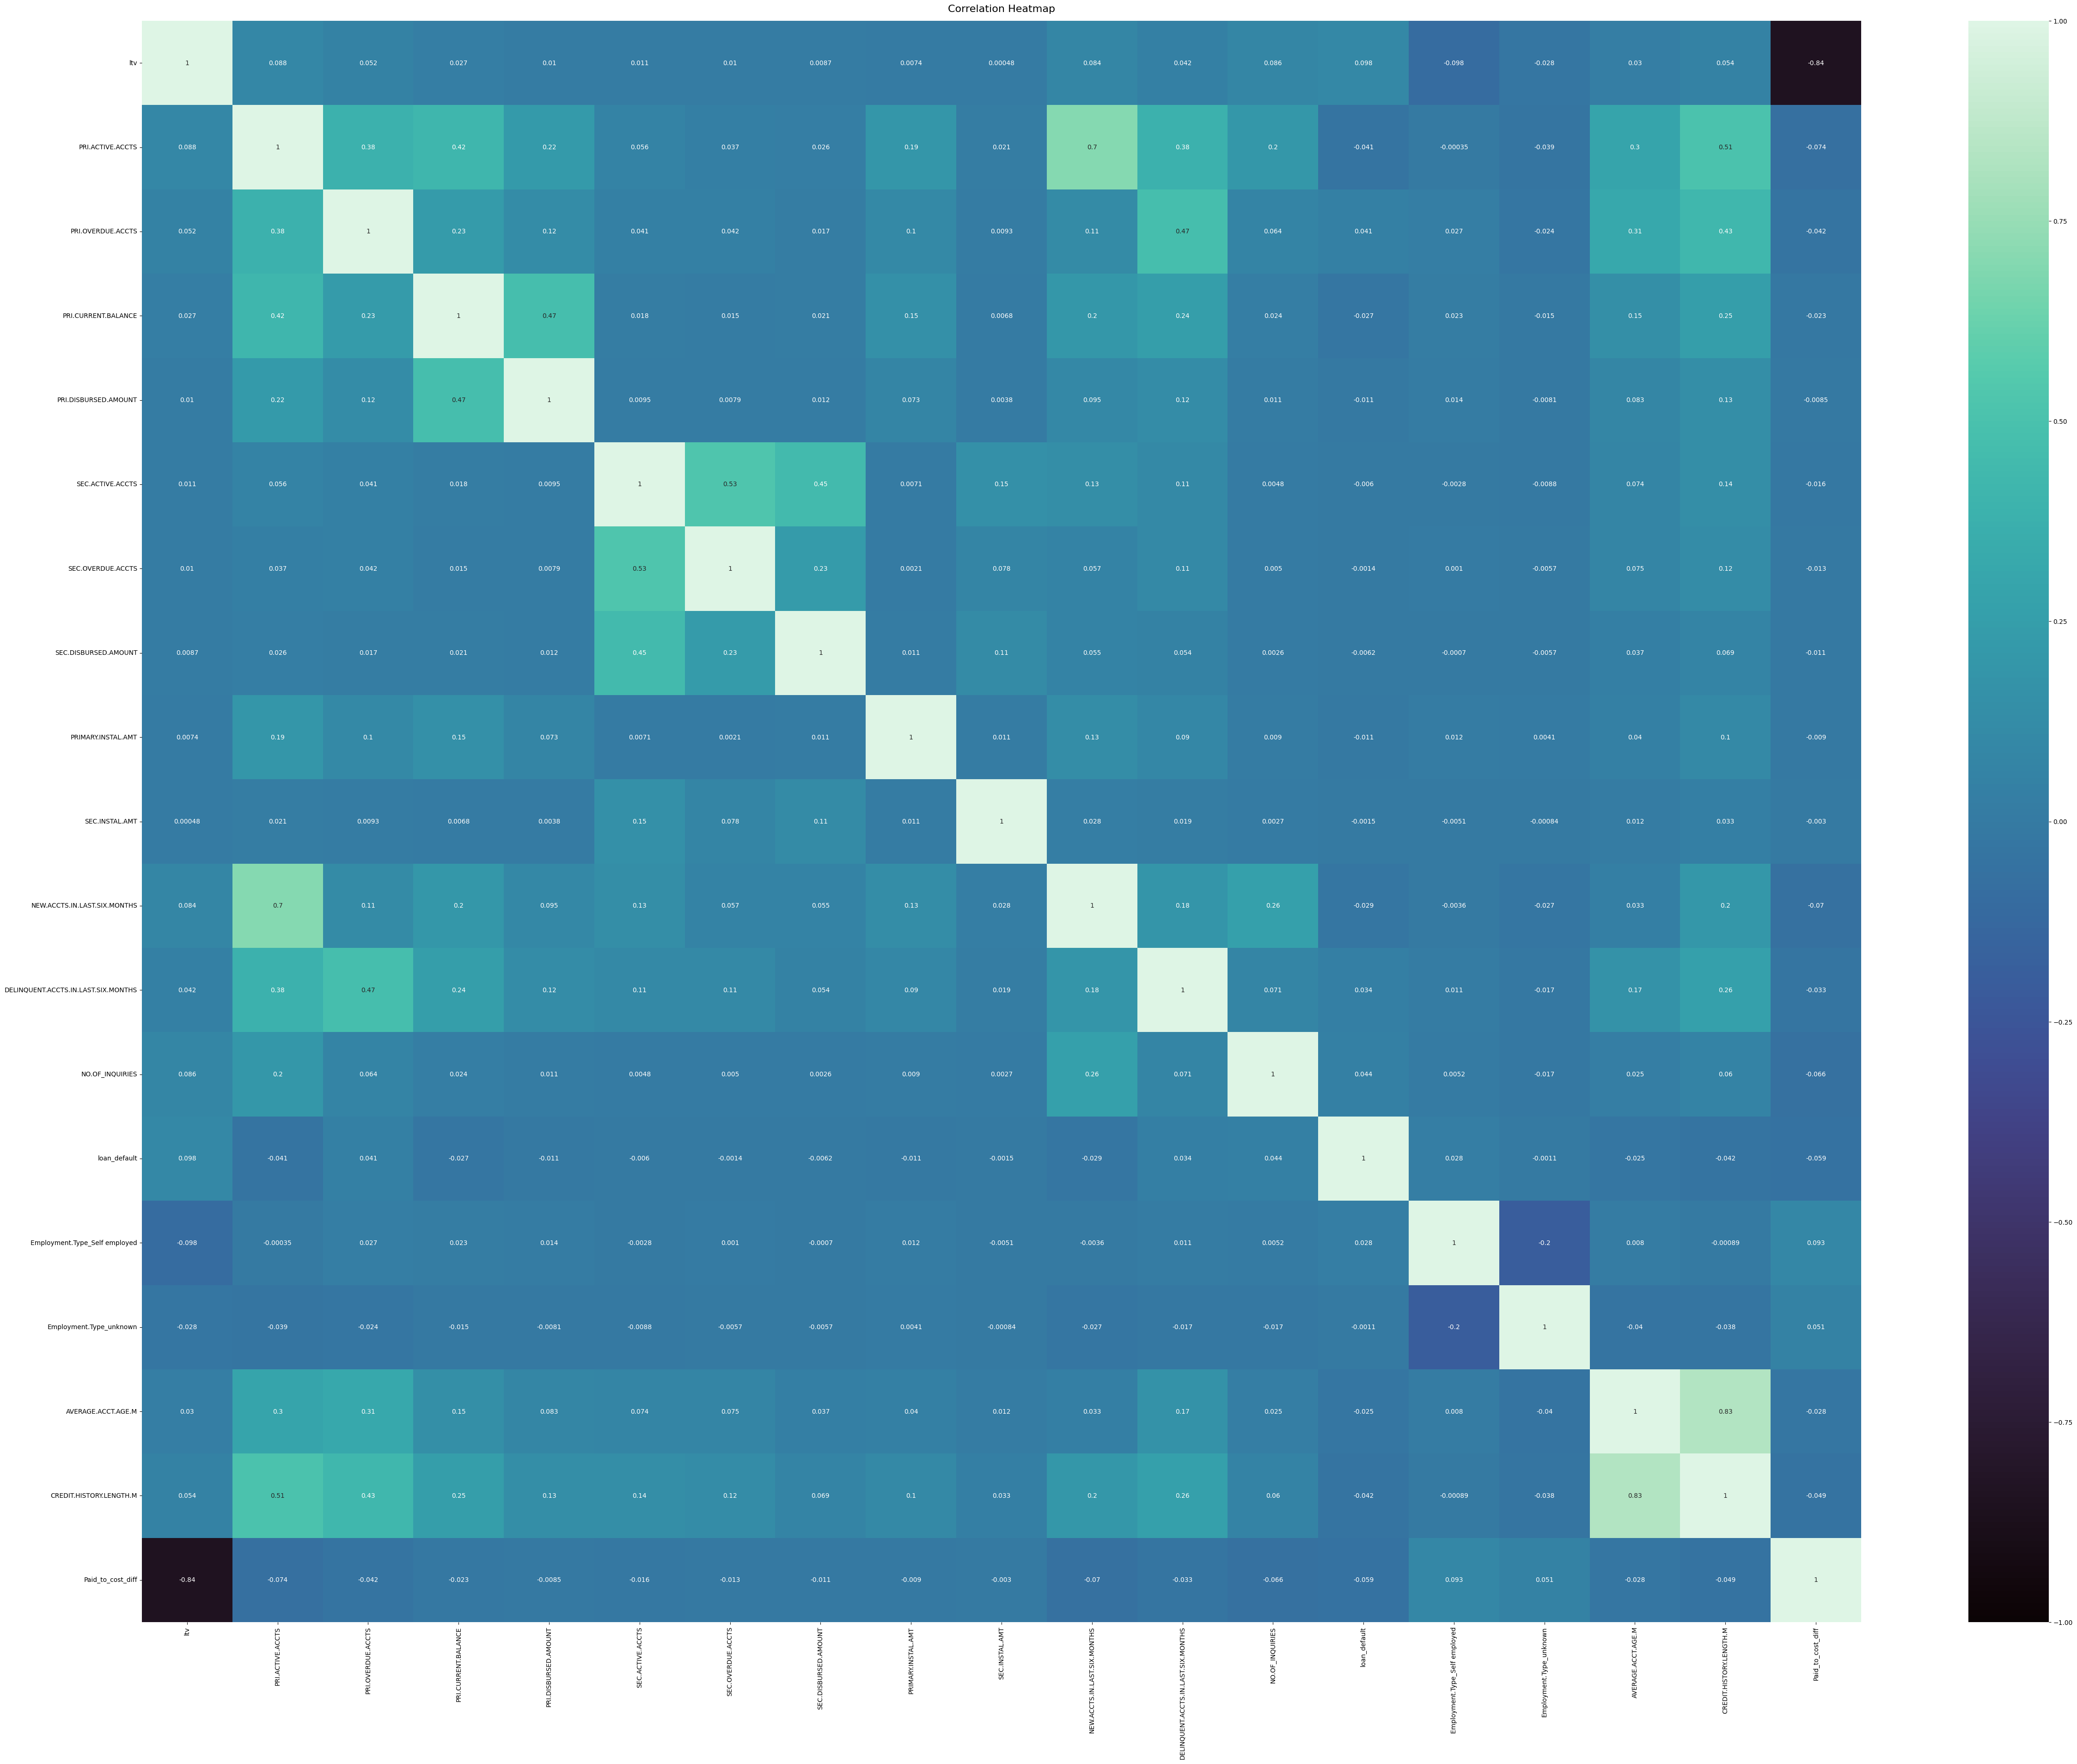

In [27]:
plt.figure(figsize=(60, 45))   # increases size of the heatmap
heatmap = sns.heatmap(DFd1.corr(), vmin=-1, vmax=1, cmap="mako", annot=True)  # sets names of the annotations as cor coefficients and annotates them and store the heatmap in variable for easier access
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=14) 

use describe method to find outliers among remaining numerical data - apply descriptive statistics to all numerical values

In [28]:
DFd1.describe()

,ltv,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Employment.Type_Self employed,Employment.Type_unknown,AVERAGE.ACCT.AGE.M,CREDIT.HISTORY.LENGTH.M,Paid_to_cost_diff
count,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,74.746530,1.039896,0.156549,1.659001e+05,2.180659e+05,0.027703,0.007244,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071,0.547428,0.032858,8.915764,16.252404,21508.074616
std,11.456636,1.941496,0.548787,9.422736e+05,2.377744e+06,0.316057,0.111079,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252,0.497747,0.178266,15.106416,28.581255,12539.547453
min,10.030000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3997.000000
25%,68.880000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13086.000000
50%,76.800000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17987.000000
75%,83.670000,1.000000,0.000000,3.500650e+04,6.080000e+04,0.000000,0.000000,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,24.000000,26606.000000
max,95.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,36.000000,8.000000,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000,1.000000,1.000000,369.000000,468.000000,638420.000000


Lets investigate the outliers.

In [29]:
numeric_columns = ['ltv', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.DISBURSED.AMOUNT', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'CREDIT.HISTORY.LENGTH.M', 'Paid_to_cost_diff']

count  = 0
for  col in numeric_columns:
    Q1 = DFd1[col].quantile(0.25)
    Q3 = DFd1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = DFd1[(DFd1[col] < lower_bound) | (DFd1[col] > upper_bound)] 
    print("Column:", col, "Count of outliers:", len(outliers), "Outliers to Sample Ratio:", (len(outliers)/len(DFd1[col])), "Mean:", DFd1[col].mean(), "\nlower_bound:", lower_bound, "Min:", DFd1[col].min(), "upper_bound:", upper_bound, "Max:", DFd1[col].max(),  "\n" )

    if len(outliers) > 0:
        count += 1

print("Number of columns with outliers:", count)
print("Numeric columns", len(numeric_columns))   

    #DFd1 = DFd1.drop(outliers.index) # drops rows with outliers


Column: ltv Count of outliers: 6170 Outliers to Sample Ratio: 0.026463195999210824 Mean: 74.74653001878589 
lower_bound: 46.694999999999986 Min: 10.03 upper_bound: 105.85500000000002 Max: 95.0 

Column: PRI.ACTIVE.ACCTS Count of outliers: 32534 Outliers to Sample Ratio: 0.13953867400945297 Mean: 1.0398963775015655 
lower_bound: -1.5 Min: 0 upper_bound: 2.5 Max: 144 

Column: PRI.OVERDUE.ACCTS Count of outliers: 26275 Outliers to Sample Ratio: 0.11269375605822761 Mean: 0.15654889043293274 
lower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 25 

Column: PRI.CURRENT.BALANCE Count of outliers: 41044 Outliers to Sample Ratio: 0.17603815503915868 Mean: 165900.07693627386 
lower_bound: -52509.75 Min: -6678296 upper_bound: 87516.25 Max: 96524920 

Column: PRI.DISBURSED.AMOUNT Count of outliers: 39712 Outliers to Sample Ratio: 0.1703251927910308 Mean: 218065.89865496624 
lower_bound: -91200.0 Min: 0 upper_bound: 152000.0 Max: 1000000000 

Column: SEC.ACTIVE.ACCTS Count of outliers: 3817 Outliers to 

##### Investigate the outliers for each column and  1% - 0.5% as the outliers, depending on difference to the mean and quantile borders.

1. ltv Count of outliers: 6170 Outliers to Sample Ratio: 0.026463195999210824 Mean: 74.74653001878589 
lower_bound: 46.694999999999986 Min: 10.03 upper_bound: 105.85500000000002 Max: 95.0 

Tentative remove: 

Count of rows where ltv < 30: 541 ratio to rows count: 0.23203547869648386



In [30]:

print("Count of rows where ltv < 40:", len(DFd1[DFd1["ltv"] < 40]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["ltv"]  < 40]))/ 233154 ))
print("Count of rows where ltv < 30:", len(DFd1[DFd1["ltv"] < 30]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["ltv"]  < 30]))/ 233154 ))
print("Count of rows where ltv < 20", len(DFd1[DFd1["ltv"] < 20]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["ltv"]  < 20]))/ 233154 ))
print("Count of rows where ltv < 15:", len(DFd1[DFd1["ltv"] < 15]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["ltv"]  < 15 ]))/ 233154 ))
print("Count of rows where ltv < 35", len(DFd1[DFd1["ltv"] < 35]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["ltv"]  < 35]))/ 233154 ))
# DFd1[DFd1["ltv"] < 40]

Count of rows where ltv < 40: 2601 ratio to rows , %: 1.1155716822357755
Count of rows where ltv < 30: 541 ratio to rows , %: 0.23203547869648386
Count of rows where ltv < 20 32 ratio to rows , %: 0.013724834229736568
Count of rows where ltv < 15: 3 ratio to rows , %: 0.0012867032090378033
Count of rows where ltv < 35 1226 ratio to rows , %: 0.5258327114267823


2.   PRI.ACTIVE.ACCTS  Count of outliers: 32534 Outliers to Sample Ratio: 0.13953867400945297 Mean: 1.0398963775015655 
lower_bound: -1.5 Min: 0 upper_bound: 2.5 Max: 144 

Tentative remove: 

Count of rows where PRI.ACTIVE.ACCTS > 13: 472 ratio to rows , %: 0.2024413048886144

In [31]:
print("Count of rows where PRI.ACTIVE.ACCTS > 13:", len(DFd1[DFd1["PRI.ACTIVE.ACCTS"] > 13]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.ACTIVE.ACCTS"]  > 13]))/ 233154 ))
print("Count of rows where PRI.ACTIVE.ACCTS > 10:", len(DFd1[DFd1["PRI.ACTIVE.ACCTS"] > 10]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.ACTIVE.ACCTS"]  > 10]))/ 233154 ))
print("Count of rows where PRI.ACTIVE.ACCTS > 15:", len(DFd1[DFd1["PRI.ACTIVE.ACCTS"] > 15]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.ACTIVE.ACCTS"]  > 15]))/ 233154 ))
print("Count of rows where PRI.ACTIVE.ACCTS > 80:", len(DFd1[DFd1["PRI.ACTIVE.ACCTS"] > 80]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.ACTIVE.ACCTS"]  > 80]))/ 233154 ))
print("Count of rows where PRI.ACTIVE.ACCTS > 100", len(DFd1[DFd1["PRI.ACTIVE.ACCTS"] >100]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.ACTIVE.ACCTS"]  > 100]))/ 233154 ))

Count of rows where PRI.ACTIVE.ACCTS > 13: 472 ratio to rows , %: 0.2024413048886144
Count of rows where PRI.ACTIVE.ACCTS > 10: 1208 ratio to rows , %: 0.5181124921725555
Count of rows where PRI.ACTIVE.ACCTS > 15: 256 ratio to rows , %: 0.10979867383789255
Count of rows where PRI.ACTIVE.ACCTS > 80: 1 ratio to rows , %: 0.00042890106967926776
Count of rows where PRI.ACTIVE.ACCTS > 100 1 ratio to rows , %: 0.00042890106967926776


3. Column: PRI.OVERDUE.ACCTS Count of outliers: 26275 Outliers to Sample Ratio: 0.11269375605822761 Mean: 0.15654889043293274 
lower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 25 


Tentative remove: 

Count of rows where PRI.OVERDUE.ACCTS > 3: 801 ratio to rows count: 0.34354975681309347 %

In [32]:
print("Count of rows where PRI.OVERDUE.ACCTS > 3:", len(DFd1[DFd1["PRI.OVERDUE.ACCTS"] > 3]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.OVERDUE.ACCTS"]  > 3]))/ 233154 ))
print("Count of rows where PRI.OVERDUE.ACCTS > 10:", len(DFd1[DFd1["PRI.OVERDUE.ACCTS"] > 10]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.OVERDUE.ACCTS"]  > 10]))/ 233154 ))
print("Count of rows where PRI.OVERDUE.ACCTS >5:", len(DFd1[DFd1["PRI.OVERDUE.ACCTS"] >5]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.OVERDUE.ACCTS"]  >5]))/ 233154 ))
print("Count of rows where PRI.OVERDUE.ACCTS > 4:", len(DFd1[DFd1["PRI.OVERDUE.ACCTS"] > 4]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.OVERDUE.ACCTS"]  > 4]))/ 233154 ))
print("Count of rows where PRI.OVERDUE.ACCTS > 2", len(DFd1[DFd1["PRI.OVERDUE.ACCTS"] >2]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.OVERDUE.ACCTS"]  > 2]))/ 233154 ))

Count of rows where PRI.OVERDUE.ACCTS > 3: 801 ratio to rows , %: 0.34354975681309347
Count of rows where PRI.OVERDUE.ACCTS > 10: 39 ratio to rows , %: 0.016727141717491442
Count of rows where PRI.OVERDUE.ACCTS >5: 231 ratio to rows , %: 0.09907614709591085
Count of rows where PRI.OVERDUE.ACCTS > 4: 397 ratio to rows , %: 0.1702737246626693
Count of rows where PRI.OVERDUE.ACCTS > 2 2003 ratio to rows , %: 0.8590888425675733


4. Column: PRI.CURRENT.BALANCE Count of outliers: 41044 Outliers to Sample Ratio: 0.17603815503915868 Mean: 165900.07693627386 
lower_bound: -52509.75 Min: -6678296 upper_bound: 87516.25 Max: 96524920 


Decided not to remove outliers beyond lower bound as the count is small and the distribution s strongly skewed towards accounts with six digits numbers.


Upper bound: 

Count of rows where PRI.CURRENT.BALANCE > 6300000: 579 ratio to rows count: 0.24833371934429604 %


In [33]:
print("Count of rows where PRI.CURRENT.BALANCE > 1600000:", len(DFd1[DFd1["PRI.CURRENT.BALANCE"] > 1600000]), "ratio to rows count:", (100*int(len(DFd1[DFd1["PRI.CURRENT.BALANCE"]  > 1600000]))/ 233154 ))
print("Count of rows where PRI.CURRENT.BALANCE > 6300000:", len(DFd1[DFd1["PRI.CURRENT.BALANCE"] > 6300000]), "ratio to rows count:", (100*int(len(DFd1[DFd1["PRI.CURRENT.BALANCE"]  > 6300000]))/ 233154 ))
print("Count of rows where PRI.CURRENT.BALANCE >5500000:", len(DFd1[DFd1["PRI.CURRENT.BALANCE"] > 5500000]), "ratio to rows count:", (100*int(len(DFd1[DFd1["PRI.CURRENT.BALANCE"]  > 5500000]))/ 233154 ))
print("Count of rows where PRI.CURRENT.BALANCE < - 5400:", len(DFd1[DFd1["PRI.CURRENT.BALANCE"] < -54000]), "ratio to rows count:", (100*int(len(DFd1[DFd1["PRI.CURRENT.BALANCE"]  < -54000]))/ 233154 ))
print("Count of rows where PRI.CURRENT.BALANCE > 4800000", len(DFd1[DFd1["PRI.CURRENT.BALANCE"]> 4800000]), "ratio to rows count:", (100*int(len(DFd1[DFd1["PRI.CURRENT.BALANCE"] > 4800000]))/ 233154 ))

Count of rows where PRI.CURRENT.BALANCE > 1600000: 5649 ratio to rows count: 2.422862142618184
Count of rows where PRI.CURRENT.BALANCE > 6300000: 579 ratio to rows count: 0.24833371934429604
Count of rows where PRI.CURRENT.BALANCE >5500000: 748 ratio to rows count: 0.3208180001200923
Count of rows where PRI.CURRENT.BALANCE < - 5400: 51 ratio to rows count: 0.021873954553642657
Count of rows where PRI.CURRENT.BALANCE > 4800000 980 ratio to rows count: 0.4203230482856824


Column: PRI.DISBURSED.AMOUNT Count of outliers: 39712 Outliers to Sample Ratio: 0.1703251927910308 Mean: 218065.89865496624 
lower_bound: -91200.0 Min: 0 upper_bound: 152000.0 Max: 1 000 000 000 

Tentative outliers:
Count of rows where PRI.DISBURSED.AMOUNT > 7000000: 687 ratio to rows , %: 0.29465503486965694

In [34]:
print("Count of rows where PRI.DISBURSED.AMOUNT > 1600000:", len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"] > 1600000]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"]  > 1600000]))/ 233154 ))
print("Count of rows where PRI.DISBURSED.AMOUNT > 7000000:", len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"] > 7000000]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"]  > 7000000]))/ 233154 ))
print("Count of rows where PRI.DISBURSED.AMOUNT >900000:", len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"] > 900000]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"]  > 900000]))/ 233154 ))
print("Count of rows where PRI.DISBURSED.AMOUNT  > 5000000:", len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"]  > 5000000]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"]  > 5000000]))/ 233154 ))
print("Count of rows where PRI.DISBURSED.AMOUNT > 300000", len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"]> 300000]), "ratio to rows , %:", (100*int(len(DFd1[DFd1["PRI.DISBURSED.AMOUNT"] > 300000]))/ 233154 ))


Count of rows where PRI.DISBURSED.AMOUNT > 1600000: 7308 ratio to rows , %: 3.1344090172160888
Count of rows where PRI.DISBURSED.AMOUNT > 7000000: 687 ratio to rows , %: 0.29465503486965694
Count of rows where PRI.DISBURSED.AMOUNT >900000: 13279 ratio to rows , %: 5.6953773042709965
Count of rows where PRI.DISBURSED.AMOUNT  > 5000000: 1260 ratio to rows , %: 0.5404153477958774
Count of rows where PRI.DISBURSED.AMOUNT > 300000 29065 ratio to rows , %: 12.466009590227918


6. **SEC.ACTIVE.ACCTS** Count of outliers: 3817 Outliers to Sample Ratio: 0.01637115382965765 Mean: 0.027702720090583905 
lower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 36 

**Remove** the column completely, as 3,817 from all the sample 233154 - 1.5% are different from zero

In [35]:

print("Count of rows where SEC.ACTIVE.ACCTS =0:", len(DFd1[DFd1["SEC.ACTIVE.ACCTS"] == 0]), "ratio to rows count:", (100*int(len(DFd1[DFd1["SEC.ACTIVE.ACCTS"]  == 0 ]))/ 233154 ))


Count of rows where SEC.ACTIVE.ACCTS =0: 229337 ratio to rows count: 98.36288461703424


7. **Column: SEC.OVERDUE.ACCTS** Count of outliers: 1337 Outliers to Sample Ratio: 0.005734407301611811 Mean: 0.007244139066882833 \nlower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 8

**Remove** the column completely, as 1,337 from all the sample 233154 - 0.57% are different from zero


In [36]:
print("Count of rows where SEC.OVERDUE.ACCTS =0:", len(DFd1[DFd1["SEC.OVERDUE.ACCTS"] == 0]), "ratio to rows count:", (100*int(len(DFd1[DFd1["SEC.OVERDUE.ACCTS"]  == 0 ]))/ 233154 ))


Count of rows where SEC.OVERDUE.ACCTS =0: 231817 ratio to rows count: 99.42655926983882


8. **Column: SEC.DISBURSED.AMOUNT** Count of outliers: 3704 Outliers to Sample Ratio: 0.01588649562092008 Mean: 7179.997872650694 \nlower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 30000000 

**Remove** the column completely, as 3,704 from all the sample 233154 - 1.59 % are different from zero

In [37]:
print("Count of rows where SEC.DISBURSED.AMOUNT =0:", len(DFd1[DFd1["SEC.DISBURSED.AMOUNT"] == 0]), "ratio to rows count:", (100*int(len(DFd1[DFd1["SEC.DISBURSED.AMOUNT"]  == 0 ]))/ 233154 ))

Count of rows where SEC.DISBURSED.AMOUNT =0: 229450 ratio to rows count: 98.411350437908


9. Column: PRIMARY.INSTAL.AMT Count of outliers: 38868 Outliers to Sample Ratio: 0.16670526776293781 Mean: 13105.48172023641 \nlower_bound: -2998.5 Min: 0 upper_bound: 4997.5 Max: 25642806 

Tentative remove Count of rows where PRIMARY.INSTAL.AMT >900000: 561 ratio to rows count, %: 0.24061350009006924

In [38]:
print("Count of rows where PRIMARY.INSTAL.AMT >900000:", len(DFd1[DFd1["PRIMARY.INSTAL.AMT"] >900000]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["PRIMARY.INSTAL.AMT"] > 900000 ]))/ 233154 ))
print("Count of rows where PRIMARY.INSTAL.AMT > 1000000:", len(DFd1[DFd1["PRIMARY.INSTAL.AMT"] > 1000000]), "ratio to rows count,%:", (100*int(len(DFd1[DFd1["PRIMARY.INSTAL.AMT"]  > 1000000]))/ 233154 ))
print("Count of rows where PRIMARY.INSTAL.AMT > 200000", len(DFd1[DFd1["PRIMARY.INSTAL.AMT"] >200000]), "ratio to rows count,%:", (100*int(len(DFd1[DFd1["PRIMARY.INSTAL.AMT"]  > 200000]))/ 233154 ))
print("Count of rows where PRIMARY.INSTAL.AMT==0", len(DFd1[DFd1["PRIMARY.INSTAL.AMT"] ==0]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["PRIMARY.INSTAL.AMT"]  == 0]))/ 233154 ))
print("Count of rows where PRIMARY.INSTAL.AMT >500000", len(DFd1[DFd1["PRIMARY.INSTAL.AMT"] > 500000]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["PRIMARY.INSTAL.AMT"]  > 500000]))/ 233154 ))


Count of rows where PRIMARY.INSTAL.AMT >900000: 561 ratio to rows count, %: 0.24061350009006924
Count of rows where PRIMARY.INSTAL.AMT > 1000000: 472 ratio to rows count,%: 0.2024413048886144
Count of rows where PRIMARY.INSTAL.AMT > 200000 2881 ratio to rows count,%: 1.2356639817459705
Count of rows where PRIMARY.INSTAL.AMT==0 159517 ratio to rows count, %: 68.41701193202776
Count of rows where PRIMARY.INSTAL.AMT >500000 1181 ratio to rows count, %: 0.5065321632912152


10. SEC.INSTAL.AMT Count of outliers: 2217 Outliers to Sample Ratio: 0.009508736714789367 Mean: 323.26844917951223 \nlower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 4170901

**Remove** the column completely, as 2,217 from all the sample 233154 - 0.95 % are different from zero

In [39]:
print("Count of rows where SEC.INSTAL.AMT==0", len(DFd1[DFd1["SEC.INSTAL.AMT"] ==0]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["SEC.INSTAL.AMT"]  == 0]))/ 233154 ))

Count of rows where SEC.INSTAL.AMT==0 230937 ratio to rows count, %: 99.04912632852107


11. Column: NEW.ACCTS.IN.LAST.SIX.MONTHS Count of outliers: 51660 Outliers to Sample Ratio: 0.22157029259630973 Mean: 0.38183346629266496 \nlower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 35

Tentative remove: Count of rows where NEW.ACCTS.IN.LAST.SIX.MONTHS >6: 687 ratio to rows count, %: 0.29465503486965694

In [40]:
print("Count of rows where NEW.ACCTS.IN.LAST.SIX.MONTHS >6:", len(DFd1[DFd1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] >6]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] > 6 ]))/ 233154 ))
print("Count of rows where NEW.ACCTS.IN.LAST.SIX.MONTHS = 0:", len(DFd1[DFd1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] == 0]), "ratio to rows count,%:", (100*int(len(DFd1[DFd1["NEW.ACCTS.IN.LAST.SIX.MONTHS"]  == 0]))/ 233154 ))
print("Count of rows where NEW.ACCTS.IN.LAST.SIX.MONTHS >7:", len(DFd1[DFd1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] >7]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] > 7 ]))/ 233154 ))


Count of rows where NEW.ACCTS.IN.LAST.SIX.MONTHS >6: 687 ratio to rows count, %: 0.29465503486965694
Count of rows where NEW.ACCTS.IN.LAST.SIX.MONTHS = 0: 181494 ratio to rows count,%: 77.84297074036903
Count of rows where NEW.ACCTS.IN.LAST.SIX.MONTHS >7: 385 ratio to rows count, %: 0.1651269118265181


12. Column: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS Count of outliers: 18195 Outliers to Sample Ratio: 0.07803854962814277 Mean: 0.09748063511670398 \nlower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 20 

Tentative remove: Count of rows where DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS >2: 784 ratio to rows count, %: 0.33625843862854593

In [41]:
print("Count of rows where DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS >2:", len(DFd1[DFd1["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"] >2]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"] > 2]))/ 233154 ))
print("Count of rows where DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS = 0:", len(DFd1[DFd1["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"] == 0]), "ratio to rows count,%:", (100*int(len(DFd1[DFd1["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"]  == 0]))/ 233154 ))
print("Count of rows where DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS >3:", len(DFd1[DFd1["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"] >3]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"] > 3 ]))/ 233154 ))

Count of rows where DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS >2: 784 ratio to rows count, %: 0.33625843862854593
Count of rows where DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS = 0: 214959 ratio to rows count,%: 92.19614503718573
Count of rows where DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS >3: 247 ratio to rows count, %: 0.10593856421077914


13. Column: NO.OF_INQUIRIES Count of outliers: 31193 Outliers to Sample Ratio: 0.133787110665054 Mean: 0.20661451229659367 \nlower_bound: 0.0 Min: 0 upper_bound: 0.0 Max: 36 

Tentative remove: Count of rows where NO.OF_INQUIRIES >5: 629 ratio to rows count, %: 0.26977877282825946

In [42]:
print("Count of rows where NO.OF_INQUIRIES >4:", len(DFd1[DFd1["NO.OF_INQUIRIES"] >4]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["NO.OF_INQUIRIES"] > 4]))/ 233154 ))
print("Count of rows where NO.OF_INQUIRIES = 0:", len(DFd1[DFd1["NO.OF_INQUIRIES"] == 0]), "ratio to rows count,%:", (100*int(len(DFd1[DFd1["NO.OF_INQUIRIES"]  == 0]))/ 233154 ))
print("Count of rows where NO.OF_INQUIRIES >5:", len(DFd1[DFd1["NO.OF_INQUIRIES"] >5]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["NO.OF_INQUIRIES"] > 5 ]))/ 233154 ))

Count of rows where NO.OF_INQUIRIES >4: 972 ratio to rows count, %: 0.4168918397282483
Count of rows where NO.OF_INQUIRIES = 0: 201961 ratio to rows count,%: 86.6212889334946
Count of rows where NO.OF_INQUIRIES >5: 629 ratio to rows count, %: 0.26977877282825946


14. Column: CREDIT.HISTORY.LENGTH.M Count of outliers: 16056 Outliers to Sample Ratio: 0.06886435574770323 Mean: 16.25240399049555 \nlower_bound: -36.0 Min: 0 upper_bound: 60.0 Max: 468 

Tentative remove: Count of rows where CREDIT.HISTORY.LENGTH.M >170: 674 ratio to rows count, %: 0.2890793209638265

In [43]:
print("Count of rows where CREDIT.HISTORY.LENGTH.M >170:", len(DFd1[DFd1["CREDIT.HISTORY.LENGTH.M"] >170]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["CREDIT.HISTORY.LENGTH.M"] > 170]))/ 233154 ))
print("Count of rows where CREDIT.HISTORY.LENGTH.M == 0:", len(DFd1[DFd1["CREDIT.HISTORY.LENGTH.M"] == 0]), "ratio to rows count,%:", (100*int(len(DFd1[DFd1["CREDIT.HISTORY.LENGTH.M"]  == 0]))/ 233154 ))
print("Count of rows where CREDIT.HISTORY.LENGTH.M >120:", len(DFd1[DFd1["CREDIT.HISTORY.LENGTH.M"] >120]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["CREDIT.HISTORY.LENGTH.M"] > 120 ]))/ 233154 ))

Count of rows where CREDIT.HISTORY.LENGTH.M >170: 674 ratio to rows count, %: 0.2890793209638265
Count of rows where CREDIT.HISTORY.LENGTH.M == 0: 119127 ratio to rows count,%: 51.093697727682134
Count of rows where CREDIT.HISTORY.LENGTH.M >120: 4263 ratio to rows count, %: 1.8284052600427185


15. Column: Paid_to_cost_diff Count of outliers: 10373 Outliers to Sample Ratio: 0.04448990795783045 Mean: 21508.074615919093 
lower_bound: -7194.0 Min: 3997 upper_bound: 46886.0 Max: 638420 

Tentative remove: Count of rows where Paid_to_cost_diff > 90000: 552 ratio to rows count, %: 0.23675339046295582

In [44]:
print("Count of rows where Paid_to_cost_diff > 5000000:", len(DFd1[DFd1["Paid_to_cost_diff"] > 500000]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["Paid_to_cost_diff"] > 500000]))/ 233154 ))
print("Count of rows where Paid_to_cost_diff > 100000:", len(DFd1[DFd1["Paid_to_cost_diff"] > 100000]), "ratio to rows count,%:", (100*int(len(DFd1[DFd1["Paid_to_cost_diff"]  > 100000]))/ 233154 ))
print("Count of rows where Paid_to_cost_diff > 90000:", len(DFd1[DFd1["Paid_to_cost_diff"] > 90000]), "ratio to rows count, %:", (100*int(len(DFd1[DFd1["Paid_to_cost_diff"] > 90000]))/ 233154 ))

Count of rows where Paid_to_cost_diff > 5000000: 1 ratio to rows count, %: 0.00042890106967926776
Count of rows where Paid_to_cost_diff > 100000: 239 ratio to rows count,%: 0.102507355653345
Count of rows where Paid_to_cost_diff > 90000: 552 ratio to rows count, %: 0.23675339046295582


Column: age Count of outliers: 19866 Outliers to Sample Ratio: 0.08520548650248334 Mean: 25.949611093588118 
lower_bound: 4.091718001368921 Min: -50.392881587953454 upper_bound: 58.290212183436005 Max: 49.828884325804246 

In [45]:
'''DFd1_filt= DFd1.drop(["SEC.ACTIVE.ACCTS", "SEC.OVERDUE.ACCTS", "SEC.DISBURSED.AMOUNT", "SEC.INSTAL.AMT"], axis=1)
DFd1_filt = DFd1
DFd1_filt.shape'''

'DFd1_filt= DFd1.drop(["SEC.ACTIVE.ACCTS", "SEC.OVERDUE.ACCTS", "SEC.DISBURSED.AMOUNT", "SEC.INSTAL.AMT"], axis=1)\nDFd1_filt = DFd1\nDFd1_filt.shape'

In [46]:
#DFd1_filt.info()

Drop all outlier beyond tresholds for further processing and testing. If the tests show the model overfitting or underfitting, change the tresholds. 

In [47]:

    
'''DFd1_filt = DFd1.drop(["SEC.ACTIVE.ACCTS", "SEC.OVERDUE.ACCTS", "SEC.DISBURSED.AMOUNT", "SEC.INSTAL.AMT"], axis=1)\
    .loc[(DFd1["ltv"] >= 30) & (DFd1["PRI.ACTIVE.ACCTS"] <= 13) & (DFd1["PRI.OVERDUE.ACCTS"] <= 3) & 
         (DFd1["PRI.CURRENT.BALANCE"] <= 6300000) & (DFd1["PRI.DISBURSED.AMOUNT"] <= 7000000) & 
         (DFd1["PRIMARY.INSTAL.AMT"] <= 900000) & (DFd1["NEW.ACCTS.IN.LAST.SIX.MONTHS"] <= 6) & 
         (DFd1["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"] <= 2) & (DFd1["NO.OF_INQUIRIES"] <= 5) & 
         (DFd1["CREDIT.HISTORY.LENGTH.M"] <= 170) & (DFd1["Paid_to_cost_diff"] <= 90000)]\
    .reset_index(drop=True)'''
    

    
DFd1_filt = DFd1.drop(["SEC.ACTIVE.ACCTS", "SEC.OVERDUE.ACCTS", "SEC.DISBURSED.AMOUNT", "SEC.INSTAL.AMT"], axis=1)\
    .loc[(DFd1["ltv"] >= 30) & (DFd1["PRI.ACTIVE.ACCTS"] <= 13) & (DFd1["PRI.CURRENT.BALANCE"] <= 6300000) &  (DFd1["PRI.DISBURSED.AMOUNT"] <= 7000000) & (DFd1["PRIMARY.INSTAL.AMT"] <= 900000)]\
    .reset_index(drop=True)

In [48]:
DFd1_filt.shape


(231046, 22)

In [49]:
print(DFd1_filt.describe())

                 ltv  PRI.ACTIVE.ACCTS  PRI.OVERDUE.ACCTS  \
count  231046.000000     231046.000000      231046.000000   
mean       74.844846          0.983237           0.149204   
std        11.230204          1.711292           0.513479   
min        30.000000          0.000000           0.000000   
25%        68.940000          0.000000           0.000000   
50%        76.820000          0.000000           0.000000   
75%        83.680000          1.000000           0.000000   
max        95.000000         13.000000          23.000000   

       PRI.CURRENT.BALANCE  PRI.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
count         2.310460e+05          2.310460e+05       231046.000000   
mean          1.274819e+05          1.661474e+05         7967.874458   
std           4.539676e+05          5.420379e+05        44966.721350   
min          -2.018309e+06          0.000000e+00            0.000000   
25%           0.000000e+00          0.000000e+00            0.000000   
50%           0.00

Text(0.5, 1.0, 'Correlation Heatmap')

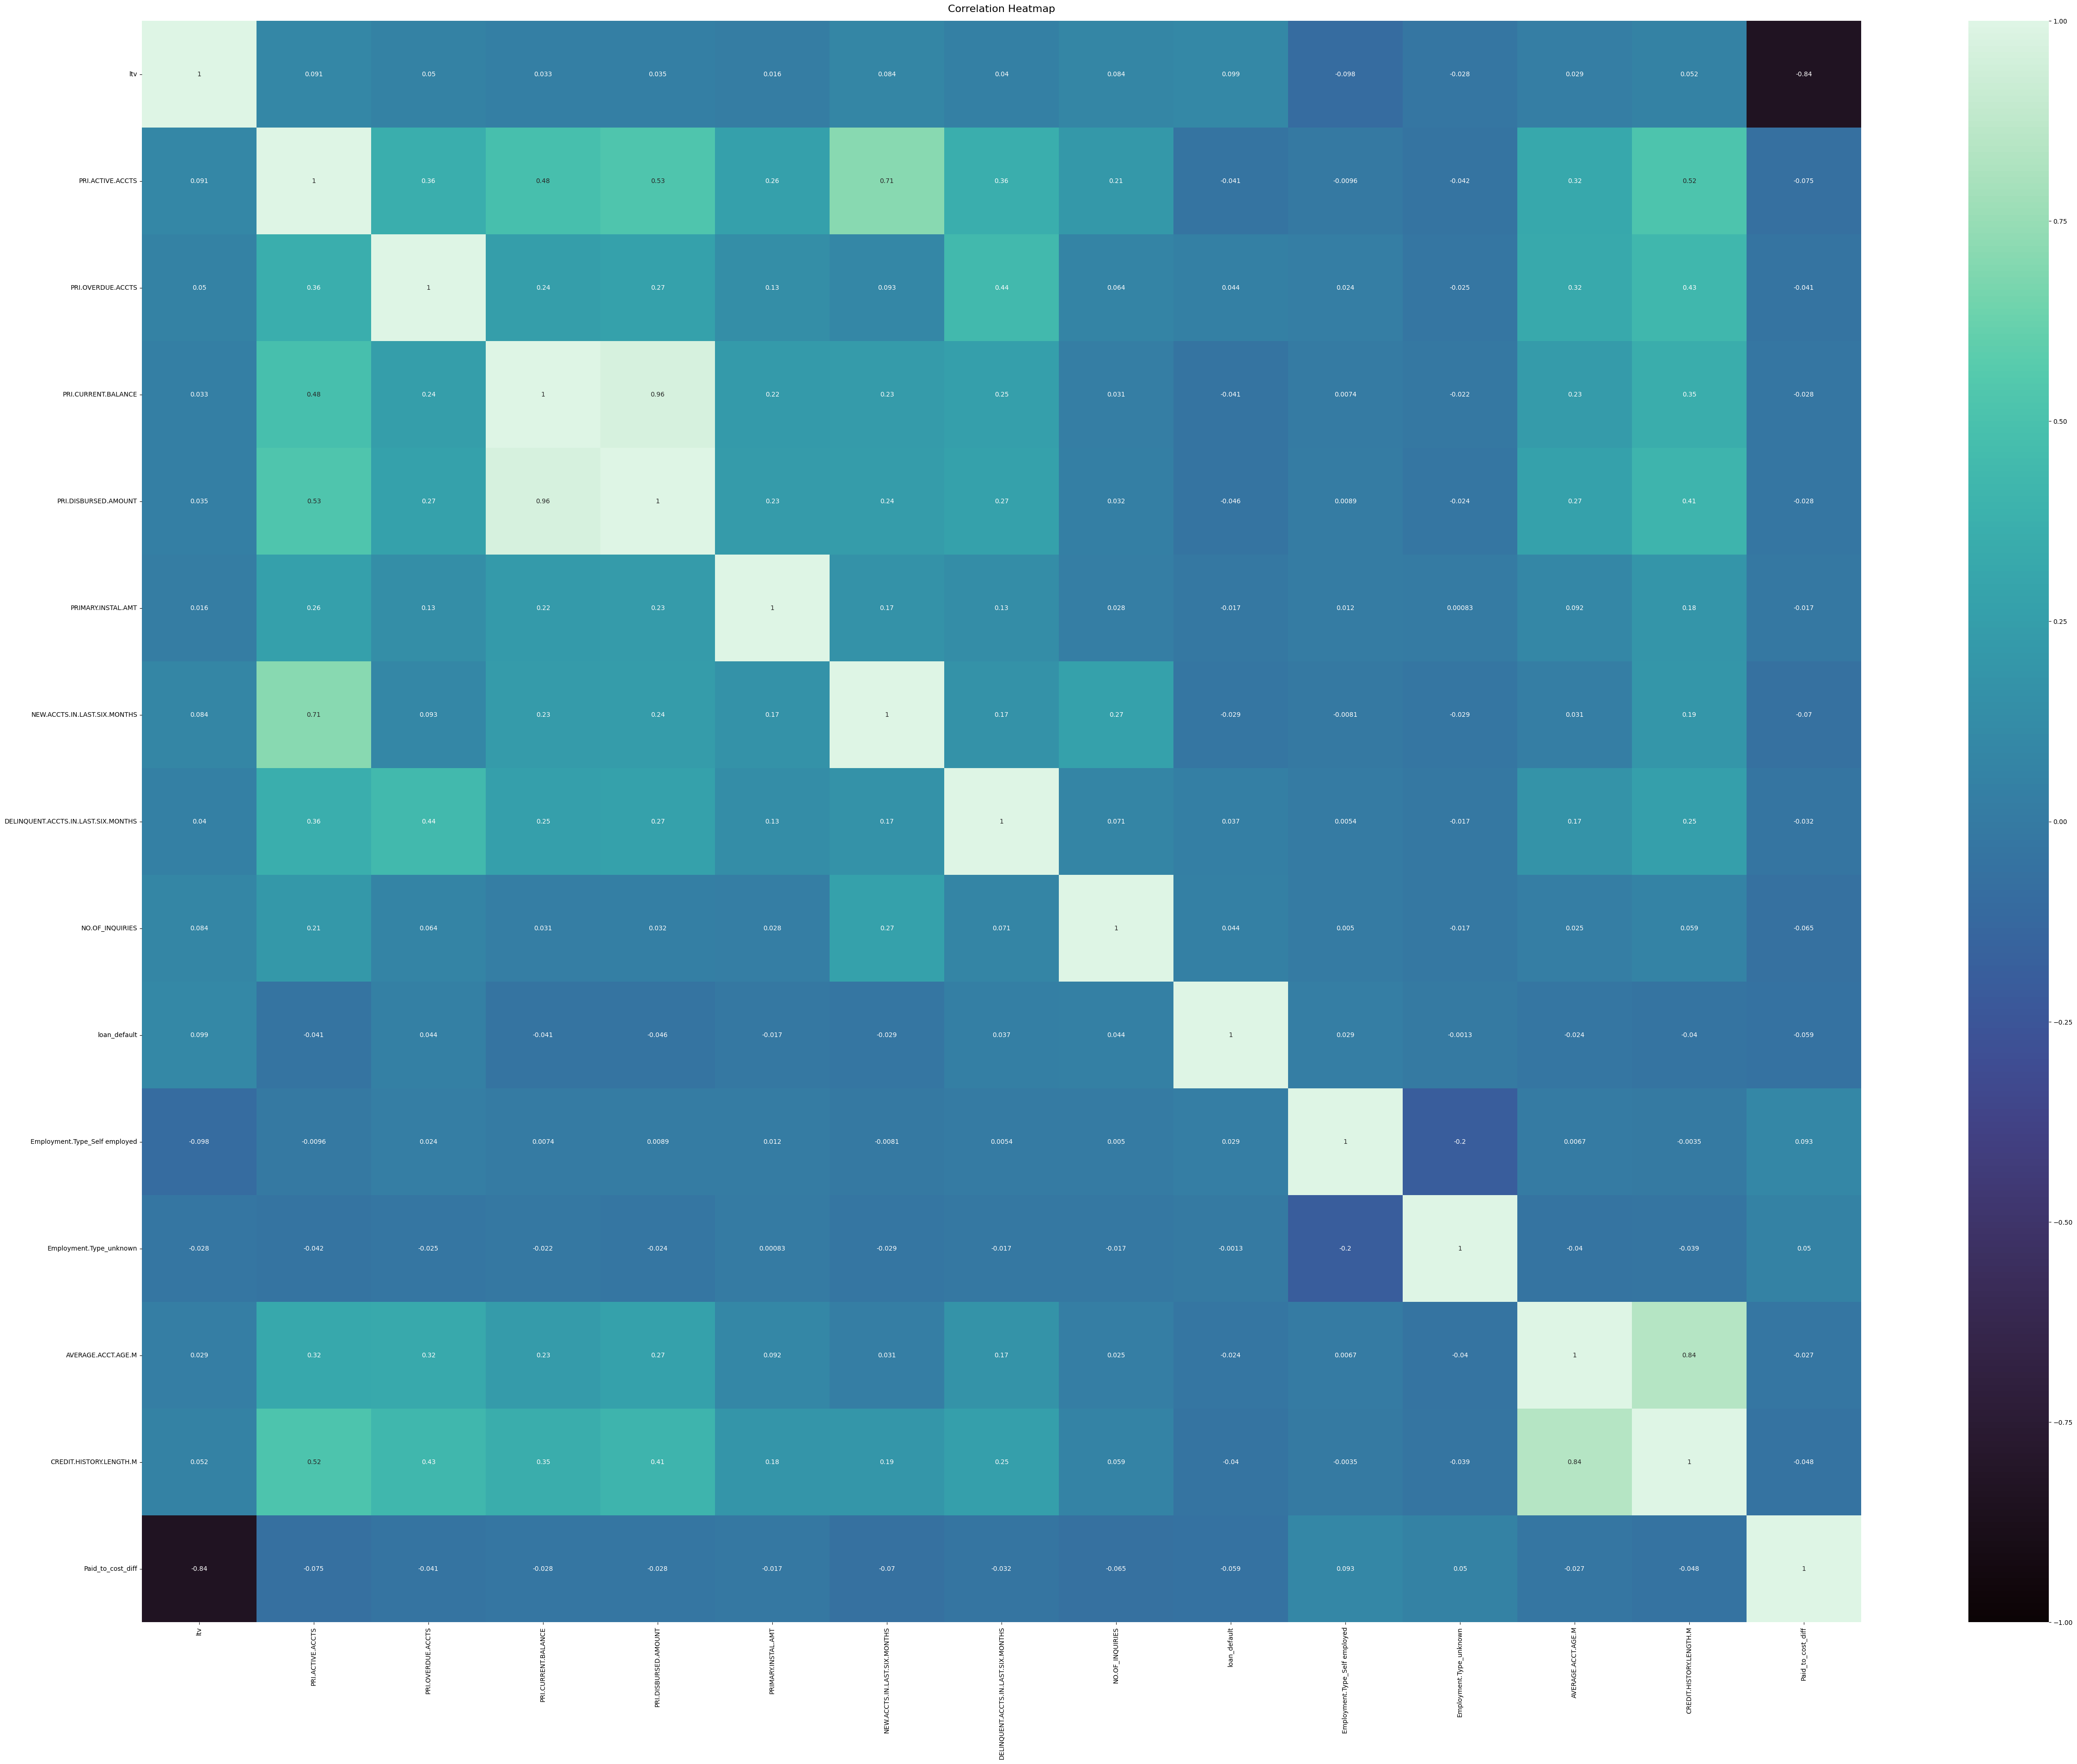

In [50]:
plt.figure(figsize=(60, 45))   # increases size of the heatmap
heatmap = sns.heatmap(DFd1_filt.corr(), vmin=-1, vmax=1, cmap="mako", annot=True)  # sets names of the annotations as cor coefficients and annotates them and store the heatmap in variable for easier access
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=14) 

To use Logistic regression and SVM, avoiding bias, lets scale the numeric data and category of order('PERFORM_CNS.SCORE.DESCRIPTION') to improve the accuracy. We use MinMaxScaler within [0,1] range we are seeking for binomial problem solution. 

 We won't scale categorical dummy data  as this does not make sense and also loses out on interpretability.(!!! SOURCE)

In [51]:
numcol_stand = ['ltv', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'CREDIT.HISTORY.LENGTH.M', 'Paid_to_cost_diff', 'AVERAGE.ACCT.AGE.M', 'PERFORM_CNS.SCORE.DESCRIPTION']
# Scale each feature to 0-1


#scaler = MinMaxScaler(feature_range = (0, 1)) 

scaler = StandardScaler()

for col in numcol_stand:
    
   DFd1_filt[col] = scaler.fit_transform(DFd1_filt[col].values.reshape(-1,1))


DFd1_filt.describe()


,ltv,PERFORM_CNS.SCORE.DESCRIPTION,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Employment.Type_Self employed,Employment.Type_unknown,AVERAGE.ACCT.AGE.M,CREDIT.HISTORY.LENGTH.M,Paid_to_cost_diff
count,2.310460e+05,2.310460e+05,2.310460e+05,2.310460e+05,2.310460e+05,2.310460e+05,2.310460e+05,2.310460e+05,2.310460e+05,2.310460e+05,231046.000000,231046.000000,231046.000000,2.310460e+05,2.310460e+05,2.310460e+05
mean,-8.315693e-16,-8.118872e-18,2.029718e-18,-5.289568e-18,-2.509469e-17,6.027647e-18,-9.102977e-18,4.223966e-17,1.691432e-18,1.230132e-18,0.217762,0.546116,0.032855,8.457158e-18,7.811339e-18,-1.119420e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.412726,0.497870,0.178257,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.993244e+00,-7.998589e-01,-5.745595e-01,-2.905754e-01,-4.726760e+00,-3.065242e-01,-1.771953e-01,-4.097527e-01,-2.567196e-01,-2.918503e-01,0.000000,0.000000,0.000000,-5.863329e-01,-5.664213e-01,-1.414580e+00
25%,-5.258015e-01,-7.998589e-01,-5.745595e-01,-2.905754e-01,-2.808178e-01,-3.065242e-01,-1.771953e-01,-4.097527e-01,-2.567196e-01,-2.918503e-01,0.000000,0.000000,0.000000,-5.863329e-01,-5.664213e-01,-6.767821e-01
50%,1.758791e-01,-7.998589e-01,-5.745595e-01,-2.905754e-01,-2.808178e-01,-3.065242e-01,-1.771953e-01,-4.097527e-01,-2.567196e-01,-2.918503e-01,0.000000,1.000000,0.000000,-5.863329e-01,-5.664213e-01,-2.796499e-01
75%,7.867331e-01,1.082422e+00,9.795482e-03,-2.905754e-01,-2.081203e-01,-1.976755e-01,-1.348305e-01,-4.097527e-01,-2.567196e-01,-2.918503e-01,0.000000,1.000000,0.000000,2.750381e-01,2.517836e-01,4.174989e-01
max,1.794731e+00,1.552992e+00,7.022056e+00,4.450200e+01,1.359029e+01,1.258472e+01,1.983765e+01,2.537688e+01,3.309856e+01,5.079534e+01,1.000000,1.000000,1.000000,2.386335e+01,1.608227e+01,5.011153e+01


Lets explore the target variable distribution/ 

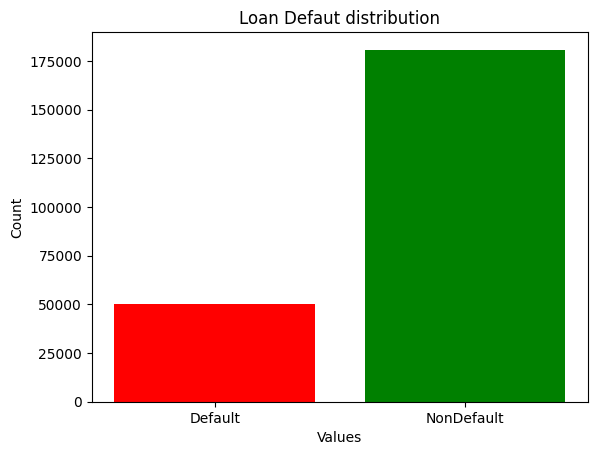

In [52]:
x = np.array(DFd1_filt['loan_default'])
# count the number of 1s and 0s in the array
ones_count = np.count_nonzero(x == 1)
zeros_count = np.count_nonzero(x == 0)

# create a bar chart
colors = ['red', 'green']
plt.bar(['Default', 'NonDefault'], [ones_count, zeros_count], color=colors)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Loan Defaut distribution')
plt.show()

In [53]:
DFd1_filt.shape

(231046, 22)

As the distribution is unbalanced, to overcome the bias, we might use techniques such as oversampling the minority class or undersampling the majority class to balance the dataset as Logistic Regression and I am not going to use decision trees and random forest, robust to the distribution inbalance. Oversampling involves randomly duplicating samples from the minority class to increase its representation in the dataset. This can be done using techniques such as random oversampling or Synthetic Minority Over-sampling Technique (SMOTE).

In [54]:


DFd1_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231046 entries, 0 to 231045
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ltv                                  231046 non-null  float64 
 1   MobileNo_Avl_Flag                    231046 non-null  category
 2   Aadhar_flag                          231046 non-null  category
 3   PAN_flag                             231046 non-null  category
 4   VoterID_flag                         231046 non-null  category
 5   Driving_flag                         231046 non-null  category
 6   Passport_flag                        231046 non-null  category
 7   PERFORM_CNS.SCORE.DESCRIPTION        231046 non-null  float64 
 8   PRI.ACTIVE.ACCTS                     231046 non-null  float64 
 9   PRI.OVERDUE.ACCTS                    231046 non-null  float64 
 10  PRI.CURRENT.BALANCE                  231046 non-null  float64 
 11  

In [55]:
for col in DFd1_filt.columns:
    if DFd1_filt[col].dtype == 'category' or DFd1_filt[col].dtype == 'uint8':
        DFd1_filt[col] = DFd1_filt[col].astype('int64')
DFd1_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231046 entries, 0 to 231045
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ltv                                  231046 non-null  float64
 1   MobileNo_Avl_Flag                    231046 non-null  int64  
 2   Aadhar_flag                          231046 non-null  int64  
 3   PAN_flag                             231046 non-null  int64  
 4   VoterID_flag                         231046 non-null  int64  
 5   Driving_flag                         231046 non-null  int64  
 6   Passport_flag                        231046 non-null  int64  
 7   PERFORM_CNS.SCORE.DESCRIPTION        231046 non-null  float64
 8   PRI.ACTIVE.ACCTS                     231046 non-null  float64
 9   PRI.OVERDUE.ACCTS                    231046 non-null  float64
 10  PRI.CURRENT.BALANCE                  231046 non-null  float64
 11  PRI.DISBURSED

In [56]:
X = DFd1_filt.drop('loan_default', axis=1)
y = DFd1_filt['loan_default']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [57]:
'''X = DFd1_filt.drop('loan_default', axis=1)
y = DFd1_filt['loan_default']

adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)'''

"X = DFd1_filt.drop('loan_default', axis=1)\ny = DFd1_filt['loan_default']\n\nadasyn = ADASYN()\nX_resampled, y_resampled = adasyn.fit_resample(X, y)"

NOw I should round the categoric variables back to integers

In [58]:
X_resampled[['VoterID_flag', 'Driving_flag', 'Passport_flag', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'Employment.Type_Self employed', 'PAN_flag', 'Employment.Type_unknown']] = np.round(X_resampled[['VoterID_flag', 'Driving_flag', 'Passport_flag', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'Employment.Type_Self employed', 'PAN_flag', 'Employment.Type_unknown']])



y_resampled = np.round(y_resampled)

As Employment.Type column was decomposed by dummy variables (otherwise it could be One Hot) method to three columns, even they are binary, lets convert them back to categorical type. It allows for easier interpretation and analysis of the data. As other columns, including loan_default, were not transformed during data preprocessing, lets leave them integers.

In [59]:
'''
X_resampled['Employment.Type_Self employed'] = X_resampled['Employment.Type_Self employed'].astype('category')
X_resampled['Employment.Type_unknown'] = X_resampled['Employment.Type_unknown'].astype('category')'''

"\nX_resampled['Employment.Type_Self employed'] = X_resampled['Employment.Type_Self employed'].astype('category')\nX_resampled['Employment.Type_unknown'] = X_resampled['Employment.Type_unknown'].astype('category')"

Now we can split the dataset to start to fit the logistic regression model and as we have outliers, feature selection and hyperparameters optional, we additionally split train set to train and validation.

In [60]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42)

# Split train and validation sets
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=42)


In [61]:


# Make the model with the specified regularization parameter
log_reg = LogisticRegression(penalty="none",solver = "sag")

# Train on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='none', solver='sag')

In [62]:
# predictions and quick metrics for logistic regression
log_reg_pred = log_reg.predict(X_val) 
score = log_reg.score(X_val, y_val)
print('log_reg score:', score)

log_reg score: 0.5915016725431697


In [63]:
log_reg_predT = log_reg.predict(X_test) # predictions for test set

print("Accuracy of logistic regression model ",accuracy_score(y_test, log_reg_predT))
print("F1 Score ",f1_score(y_test, log_reg_predT))
print("Recall Score ",recall_score(y_test, log_reg_predT))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, log_reg_predT))

print(confusion_matrix(y_test, log_reg_predT))

Accuracy of logistic regression model  0.5967170785687939
F1 Score  0.6184476861869199
Recall Score  0.6555078789672265
Balanced Accuracy Score  0.596881431575131
[[14633 12553]
 [ 9313 17721]]


In [64]:
# Make the model with the specified regularization parameter
reg_log_reg= LogisticRegression(C = 0.007)

# Train on the training data
reg_log_reg.fit(X_train, y_train)

LogisticRegression(C=0.007)

In [65]:
# predictions and quick evaluatiion of the validation set

reg_log_reg_pred = reg_log_reg.predict(X_val)
scoreR = reg_log_reg.score(X_val, y_val)
print('reg_log_reg score:', scoreR)


reg_log_reg score: 0.5911581231353403


In [66]:
reg_log_reg_predT = reg_log_reg.predict(X_test) # predictions, using test set

print("Accuracy of regularirized logistic regression model ",accuracy_score(y_test, reg_log_reg_predT))
print("F1 Score ",f1_score(y_test, reg_log_reg_predT))
print("Recall Score ",recall_score(y_test, reg_log_reg_predT))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, reg_log_reg_predT))

print("Confusion Matrix", confusion_matrix(y_test, reg_log_reg_predT))


auc_score_T = roc_auc_score(y_test, reg_log_reg_predT )
print("AUC score for logistic regression:", auc_score_T)

Accuracy of regularirized logistic regression model  0.5959055699004058
F1 Score  0.6174395865344321
Recall Score  0.6540282607087371
Balanced Accuracy Score  0.5960680551686112
Confusion Matrix [[14629 12557]
 [ 9353 17681]]
AUC score for logistic regression: 0.5960680551686112


log_reg = LogisticRegression(penalty="none",solver = 'sag'LogisticRegression(C=0.0001)

1. 19 features, removed one of the dummies, got +0.009 to the score.
log_reg score: 0.5197162184458011, reg_log_reg score: 0.5204495041155658
  
2. added all the flags: log_reg score: 0.52046783625731, reg_log_reg score: 0.5208344790921924 

3. removed drop outliers:log_reg score: 0.5216706349916754, reg_log_reg score: 0.5209724484863675
4. changed scaler to Standard: log_reg score: log_reg score: 0.5248393275926887, reg_log_reg score: 0.5195223688214969
5. LogisticRegression(C=0.001): reg_log_reg score: 0.5235682701086665 
6. Found error in the code/ results after the correction:
Accuracy of logistic regression model  0.5931011814546318
F1 Score  0.614006824992638
Recall Score  0.6461173897192855
Balanced Accuracy Score  0.5930071088646915
7. the most outliers removed 
Accuracy of logistic regression model  0.5960715603098488
F1 Score  0.6176568146505823
Recall Score  0.6543611748168973
Balanced Accuracy Score  0.5962345122226913
1. Final model 
Accuracy of logistic regression model  0.5983769826632239
F1 Score  0.6209177633869508
Recall Score  0.6596878005474588
Balanced Accuracy Score  0.5985483805209155

LogisticRegression
LogisticRegression(C=0.007)
reg_log_reg score: 0.5876864659614863
log_reg score: 0.5976023607524898
[[14619 12567]
 [ 9251 17783]]
60.0
Accuracy of regularirized logistic regression model  0.5976023607524898
F1 Score  0.6197894883591246
Recall Score  0.6578012872678849
Balanced Accuracy Score  0.5977706502549974



tried: Perform CNS score - going to add, transform to ordinal categorical variable and treat it as a float, same as the description. log_reg score: 0.5191845863352216 reg_log_reg score: 0.514821536600121
tried what if I drop score description? log_reg score: 0.5194595684613833 reg_log_reg score: 0.5190195970595245
Added age, but before remove almost 20 000 0bservations, where wrong birth age, just to see, if and how much age affect the score. 
reg_log_reg score: 0.5179628106633503 - conclusion - remove Disbursal age and the Birth Year as noise
tried to return drop of the most nasty outliers, but the predictive power become much weaker.
returned, tried to return drop of 4 columns, useless from the outliers analysis results, but it significantly weakened the model 
tried other solvers but they reduced scores
tried to include manufacturer id as a set of categories, but it did not work well.


The best performing model for Logistic Regression algorithm found has 
validation set/log_reg score: 0.5238009989437691   test set/log_reg score: 0.5225060716176981

regularised LR:
validation set/reg_log_reg score: 0.5215632216831665, test set/log_reg score: 0.5208991472344466

Accuracy of regularirized logistic regression model  0.519884309472162
F1 Score  0.21995300921742278
Recall Score  0.13720921492728025
Balanced Accuracy Score  0.514850216362937


after mi-score applied features selection:
Accuracy of logistic regression model  0.5883622279601624
F1 Score  0.6114312575079649
Recall Score  0.649552415476807
Balanced Accuracy Score  0.5885332885888412


### Regularized Logistic regression: Optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space for Logistic Regression
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    
    # Create the Logistic Regression model with the suggested hyperparameters
    clf = LogisticRegression(
        solver=solver,
        C=C,
        max_iter=max_iter,
        random_state=42,
        n_jobs=-1
    )
    
    # Evaluate the model using cross-validation
    score = cross_val_score(clf, X_train, y_train, cv=3, n_jobs=-1, scoring='accuracy')
    accuracy = score.mean()
    
    # Return the performance metric (accuracy)
    return accuracy

# Create the study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best parameters found by Optuna
print(study.best_params)


In [ ]:
print(study.best_params)

###SVM algorithm


In [67]:
'''#Create a svm Classifier
clf = svm.SVC(C= 10, random_state =42, kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)'''

"#Create a svm Classifier\nclf = svm.SVC(C= 10, random_state =42, kernel='linear') # Linear Kernel\n\n#Train the model using the training sets\nclf.fit(X_train, y_train)\n\n#Predict the response for test dataset\ny_pred = clf.predict(X_val)"

In [68]:
'''# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_val, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_val, y_pred))

print("F1 Score ",f1_score(y_val,y_pred ))'''

'# Model Precision: what percentage of positive tuples are labeled as such?\nprint("Precision:",metrics.precision_score(y_val, y_pred))\n\n# Model Recall: what percentage of positive tuples are labelled as such?\nprint("Recall:",metrics.recall_score(y_val, y_pred))\n\nprint("F1 Score ",f1_score(y_val,y_pred ))'

In [69]:
'''y_pred_T_SVM = clf.predict(X_test)
print("Accuracy of Support Vector Machine ",accuracy_score(y_test, y_pred_T_SVM))
print("F1 Score ",f1_score(y_test, y_pred_T_SVM))
print("Recall Score ",recall_score(y_test, y_pred_T_SVM))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, y_pred_T_SVM))


auc_score_svm = roc_auc_score(y_test, y_pred_T_SVM)
print("AUC score for SVM:", auc_score_svm)'''

'y_pred_T_SVM = clf.predict(X_test)\nprint("Accuracy of Support Vector Machine ",accuracy_score(y_test, y_pred_T_SVM))\nprint("F1 Score ",f1_score(y_test, y_pred_T_SVM))\nprint("Recall Score ",recall_score(y_test, y_pred_T_SVM))\nprint("Balanced Accuracy Score ",balanced_accuracy_score(y_test, y_pred_T_SVM))\n\n\nauc_score_svm = roc_auc_score(y_test, y_pred_T_SVM)\nprint("AUC score for SVM:", auc_score_svm)'

In [70]:
'''#Create a svm Classifier
clf = svm.SVC(C= 1, random_state =42, degree=2, kernel='poly') # Polinomial Kernel degree 3 is by default, so maybe play with it?

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)'''

"#Create a svm Classifier\nclf = svm.SVC(C= 1, random_state =42, degree=2, kernel='poly') # Polinomial Kernel degree 3 is by default, so maybe play with it?\n\n#Train the model using the training sets\nclf.fit(X_train, y_train)\n\n#Predict the response for test dataset\ny_pred = clf.predict(X_val)"

In [71]:
'''# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_val, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_val, y_pred))

print("F1 Score ",f1_score(y_val,y_pred ))'''

'# Model Precision: what percentage of positive tuples are labeled as such?\nprint("Precision:",metrics.precision_score(y_val, y_pred))\n\n# Model Recall: what percentage of positive tuples are labelled as such?\nprint("Recall:",metrics.recall_score(y_val, y_pred))\n\nprint("F1 Score ",f1_score(y_val,y_pred ))'

In [72]:
'''#Create a svm Classifier
clfR = svm.SVC(C= 1, random_state =42) # default Radial Basic Function Kernel - the most abstract kernelisation

#Train the model using the training sets
clfR.fit(X_train, y_train)

#Predict the response for test dataset
y_predR = clf.predict(X_val)'''

'#Create a svm Classifier\nclfR = svm.SVC(C= 1, random_state =42) # default Radial Basic Function Kernel - the most abstract kernelisation\n\n#Train the model using the training sets\nclfR.fit(X_train, y_train)\n\n#Predict the response for test dataset\ny_predR = clf.predict(X_val)'

In [73]:
'''print("Precision:",metrics.precision_score(y_val, y_predR))
print("Recall:",metrics.recall_score(y_val, y_predR))
print("F1 Score ",f1_score(y_val,y_predR))'''

'print("Precision:",metrics.precision_score(y_val, y_predR))\nprint("Recall:",metrics.recall_score(y_val, y_predR))\nprint("F1 Score ",f1_score(y_val,y_predR))'

In [74]:
'''y_pred_T_SVM_R = clf.predict(X_test)
print("Accuracy of Support Vector Machine ",accuracy_score(y_test, y_pred_T_SVM_R))
print("F1 Score ",f1_score(y_test, y_pred_T_SVM_R))
print("Recall Score ",recall_score(y_test, y_pred_T_SVM_R))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, y_pred_T_SVM_R))

auc_score_svm = roc_auc_score(y_test, y_pred_T_SVM_R)
print("AUC score for SVMR:", auc_score_svm)
'''

'y_pred_T_SVM_R = clf.predict(X_test)\nprint("Accuracy of Support Vector Machine ",accuracy_score(y_test, y_pred_T_SVM_R))\nprint("F1 Score ",f1_score(y_test, y_pred_T_SVM_R))\nprint("Recall Score ",recall_score(y_test, y_pred_T_SVM_R))\nprint("Balanced Accuracy Score ",balanced_accuracy_score(y_test, y_pred_T_SVM_R))\n\nauc_score_svm = roc_auc_score(y_test, y_pred_T_SVM_R)\nprint("AUC score for SVMR:", auc_score_svm)\n'

Initially, raw linear SVM results for the validation set:
C = 1
Precision: 0.567593177511055
Recall: 0.7135070747906439
F1 Score  0.6322405245482168
С=10
Precision: 0.570975665486119
Recall: 0.7215925498123015
F1 Score  0.6375087696919445
C = 15
Precision: 0.567593177511055
Recall: 0.7135070747906439
F1 Score  0.6322405245482168


Try not linear borders. 
Polinomial kernel: does not do very well on the model
Precision: 0.5751633986928104
Recall: 0.1643737203204138
F1 Score  0.2556781673418075

Radial Basic Function Kernel gives best metrics, lets tune its hyperparameters. (Gamma = 'scale')
Precision: 0.6004022899582238
Recall: 0.7003320820098181
F1 Score  0.6465285992768955
Gamma 0.5 Recall: 0.16117676640683934 - much worse than by default
Gamma 0.1 Recall: 0.16236215381299615
Gamma ‘auto’


Final model test scores:

Accuracy of Support Vector Machine  0.5917189229066765
F1 Score  0.6392686623103622
Recall Score  0.7255678035066953
Balanced Accuracy Score  0.5920931050197348


The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors...C behaves as a regularization parameter in the SVM.

###XG boost algorithm.



In [75]:
xgBoo = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgBoo.fit(X_train, y_train)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
y_pred_xgBoo = xgBoo.predict(X_val)
y_pred_xgb = xgBoo.predict_proba(X_val)[:, 1]
auc_score_xgBoo = roc_auc_score(y_val, y_pred_xgb)

print("Accuracy of XG",accuracy_score(y_val, y_pred_xgBoo))
print("F1 Score ",f1_score(y_val, y_pred_xgBoo))
print("Recall Score ",recall_score(y_val, y_pred_xgBoo))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_val, y_pred_xgBoo))
print("AUC score for xgBoo:", auc_score_xgBoo)

Accuracy of XG 0.718524545701112
F1 Score  0.7207262158913547
Recall Score  0.7250577533930118
Balanced Accuracy Score  0.7185123555559676
AUC score for xgBoo: 0.811674693243034


In [76]:
# same for the text data
y_pred_xgBoo = xgBoo.predict(X_test)
y_pred_xgb = xgBoo.predict_proba(X_test)[:, 1]
auc_score_xgBoo = roc_auc_score(y_test, y_pred_xgb)

print("Accuracy of XG for test data",accuracy_score(y_test, y_pred_xgBoo))
print("F1 Score ",f1_score(y_test, y_pred_xgBoo))
print("Recall Score ",recall_score(y_test, y_pred_xgBoo))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, y_pred_xgBoo))
print("AUC score for xgBoo for test data:", auc_score_xgBoo)

Accuracy of XG for test data 0.7068240501659904
F1 Score  0.7078907714359218
Recall Score  0.7124731819190648
Balanced Accuracy Score  0.706839842633188
AUC score for xgBoo for test data: 0.7962526240215605


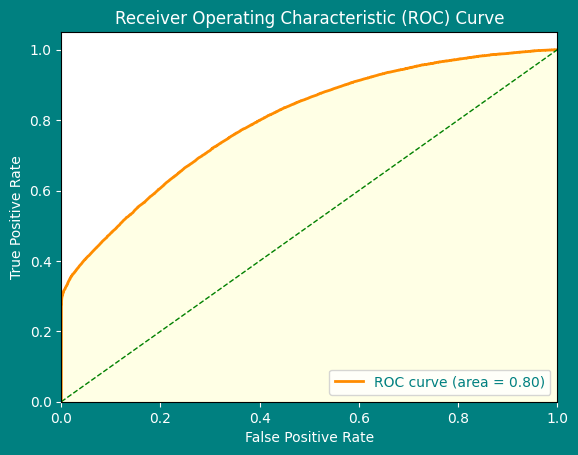

In [77]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(facecolor='teal')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate', color = 'white')
plt.tick_params(colors='white')
plt.title('Receiver Operating Characteristic (ROC) Curve', color = 'white')
plt.fill_between(fpr, tpr, color='yellow', alpha=0.1)
leg = plt.legend(loc="lower right")
leg.get_texts()[0].set_color('teal')
plt.show()

Mathplotlib colours names I can use.
1. red
2. blue
3. green
4. yellow
5. purple
6. orange
7. pink
8. brown
9. gray
10. black
11. white
12. cyan
13. magenta
14. olive
15. navy
16. teal
17. lavender
18. maroon
19. coral
20. gold
21. indigo
22. ivory
23. khaki
24. lime
25. mint
26. peach
27. periwinkle
28. rose
29. salmon
30. turquoise
    

Here are 30 facecolor names that can be used in Matplotlib:

1. white
2. black
3. red
4. green
5. blue
6. cyan
7. magenta
8. yellow
9. gray
10. lightgray
11. darkgray
12. silver
13. beige
14. tan
15. khaki
16. gold
17. orange
18. coral
19. salmon
20. pink
21. hotpink
22. purple
23. violet
24. indigo
25. lavender
26. turquoise
27. aqua
28. teal
29. olive
30. chartreuse